<a href="https://colab.research.google.com/github/jadrzy/ProjectPythonForMachineLearning/blob/main/notebooks/data_understanding_jasiek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries and datasets and droping out ID column**

In [2]:
import matplotlib.pyplot as plt5
import seaborn as sns
from time import time
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

!git clone https://{token}@github.com/jadrzy/PythonForMachineLearning.git
model_data = pd.read_csv("/content/PythonForMachineLearning/datasets/model_data.csv")
analize_data = pd.read_csv("/content/PythonForMachineLearning/datasets/analyze_data.csv")

analyze_data = analize_data.drop(['ID'], axis=1)
model_data = model_data.drop(['ID'], axis=1)

Cloning into 'PythonForMachineLearning'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 340 (delta 103), reused 170 (delta 96), pack-reused 158 (from 1)
Receiving objects: 100% (340/340), 21.51 MiB | 11.78 MiB/s, done.
Resolving deltas: 100% (161/161), done.


# **Correlation heatmap before features selection**
At this step we can see that 'Ethicity', 'Semeron', 'Country_Australia', 'Country_Canada', 'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland', 'Alcohol', 'Caffeine', 'Chocolate' are lowly correlated but lets look at cause of it in further steps.

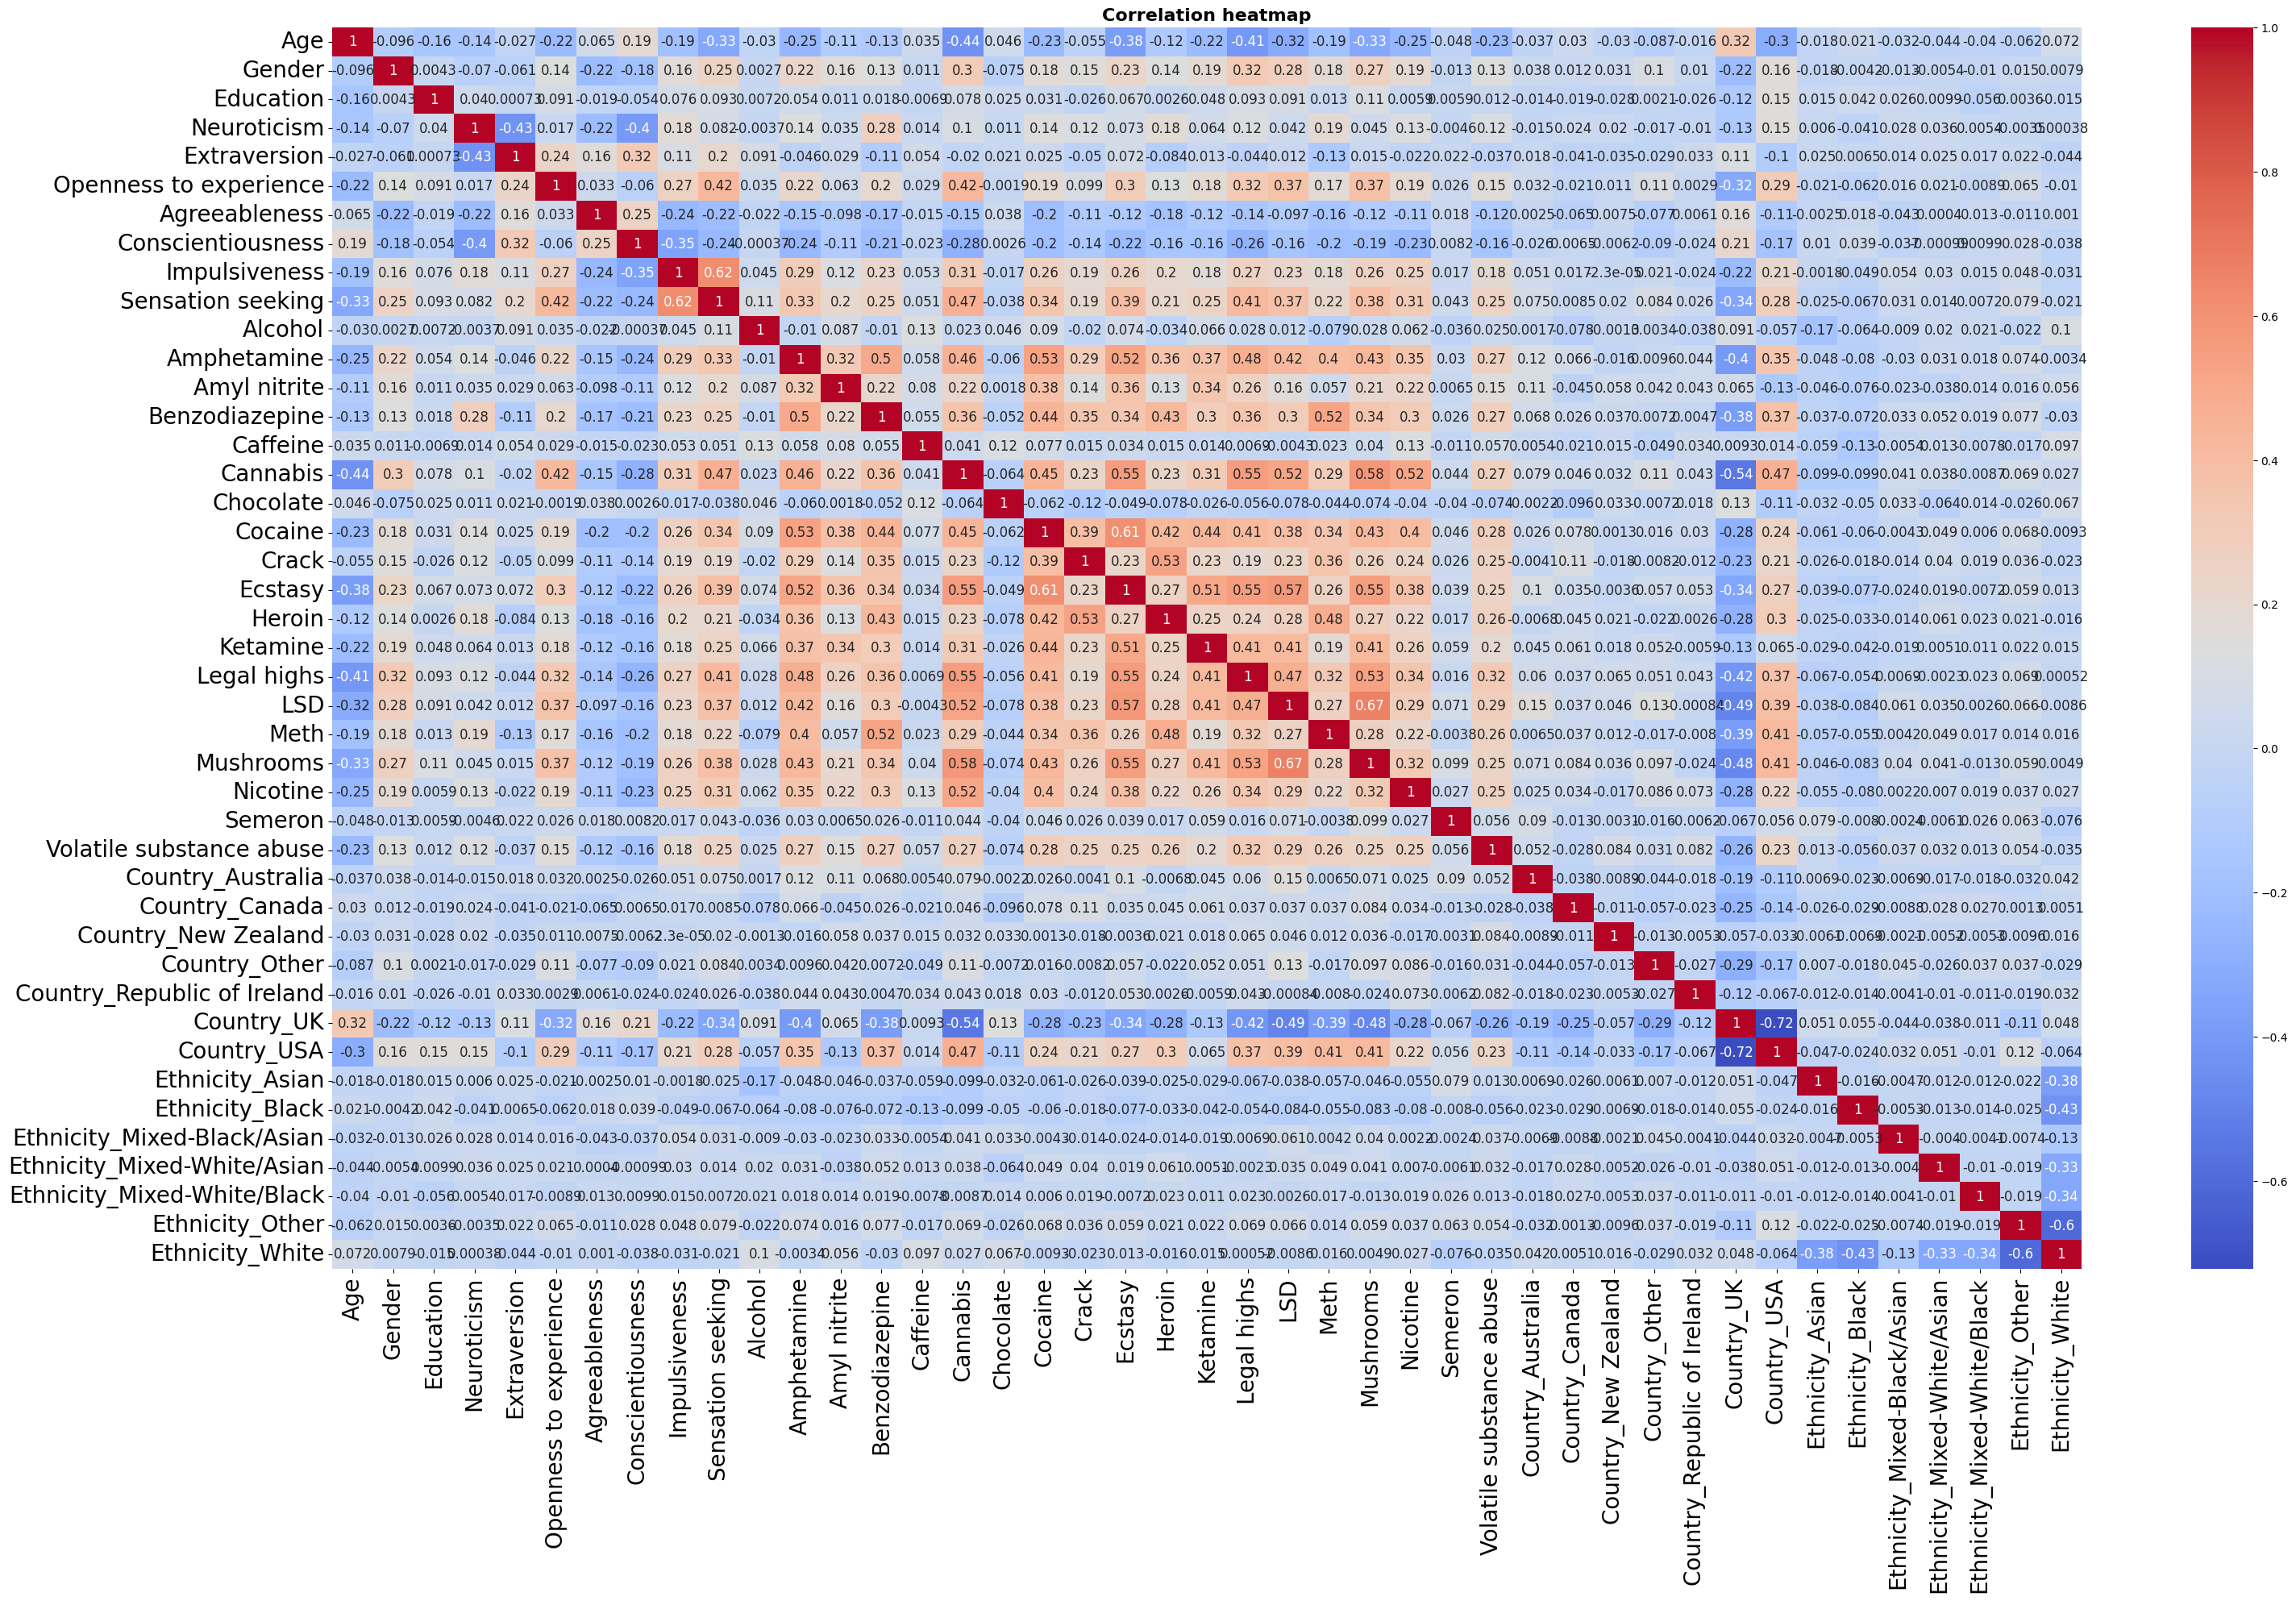

In [ ]:
corr = model_data.corr()
plt.figure(figsize=(35, 20))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, annot_kws={'size': 12})
plt.title('Correlation heatmap', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', labelsize=20)
plt.show()

# **Histograms of drugs**
As 'Alcohol', 'Caffeine', 'Chocolate' are not really illegal drugs and there are widely used with low correlation, we can exclude them for model building. Also 'Semeron' is only one value feature, then with no doubts we can get rid of it.

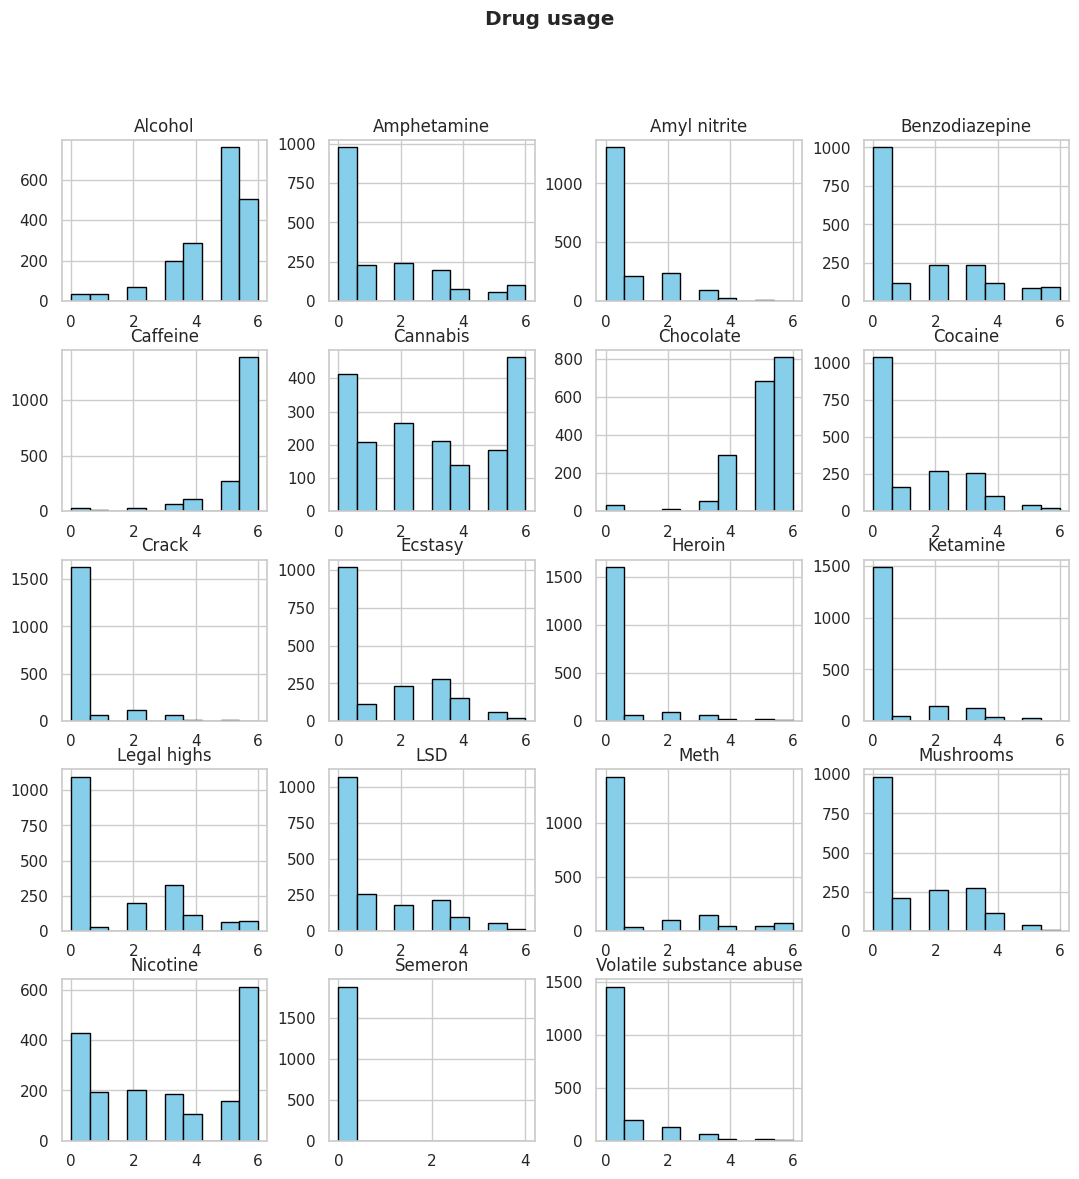

In [ ]:
drugs_data = analyze_data.loc[:, 'Alcohol':'Volatile substance abuse']
ax = drugs_data.hist(figsize=(13,13), color='skyblue', edgecolor='black')
plt.suptitle('Drug usage', fontweight='bold')
plt.show()


# **Histograms of psychological features**

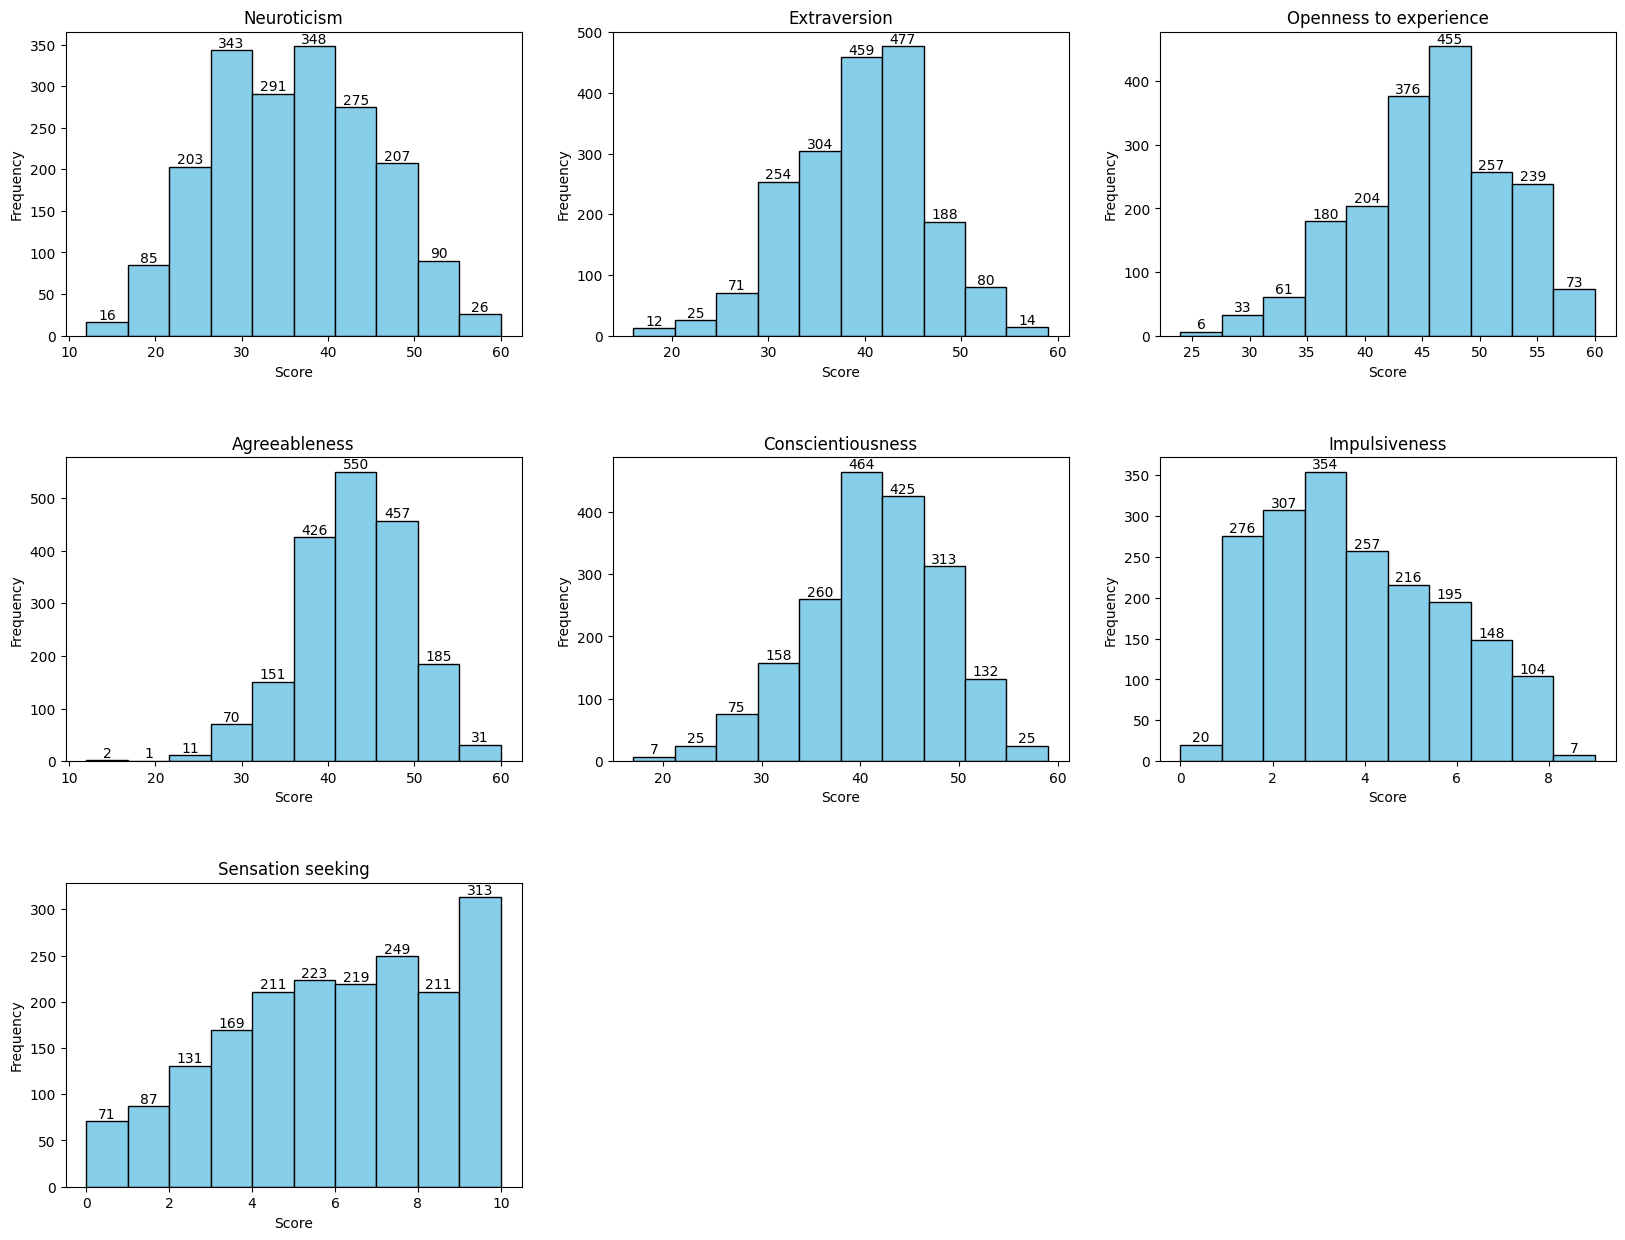

In [16]:
tests_data = analyze_data.loc[:, 'Neuroticism':'Sensation seeking']

# Calculate the number of subplots needed
num_features = len(tests_data.columns)
num_rows = 3  # Changed to 3 rows
num_cols = (num_features + num_rows - 1) // num_rows  # Adjust calculation

# Create subplots with calculated dimensions
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))  # Adjust figsize
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4) #Adjust vertical space between rows

# Iterate and plot, only up to the number of features
for i, feature in enumerate(tests_data.columns):
    ax = axes[i]
    counts, bins, patches = ax.hist(tests_data[feature], color='skyblue', edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

    # Add numbers for each graph value
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        ax.text(x, count, str(int(count)), ha='center', va='bottom')

# Hide any remaining empty subplots (if any)
for i in range(num_features, len(axes)):
    axes[i].axis('off')  # Turn off the axis for empty plots


plt.savefig("psychological_tests_histograms.png")
plt.show()

# **Histograms of personal features**
As we can see 'Ethicity' is mostly focused on 'White' so we can exclude this whole feature. 'Country' is mostly focused on both 'UK' and 'USA', so we are keeping these two features and let go of remaining ones.

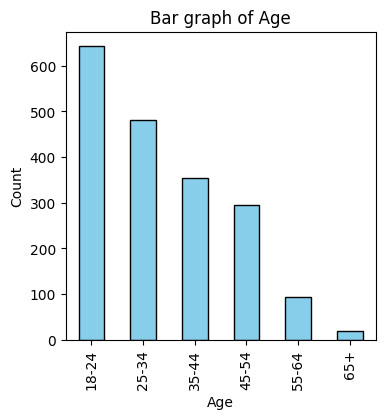

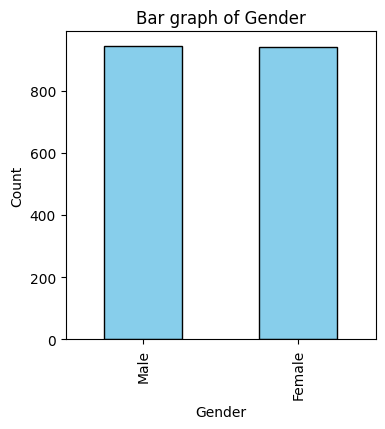

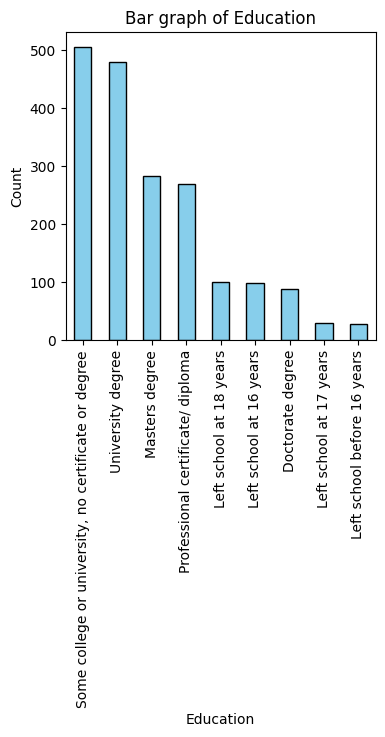

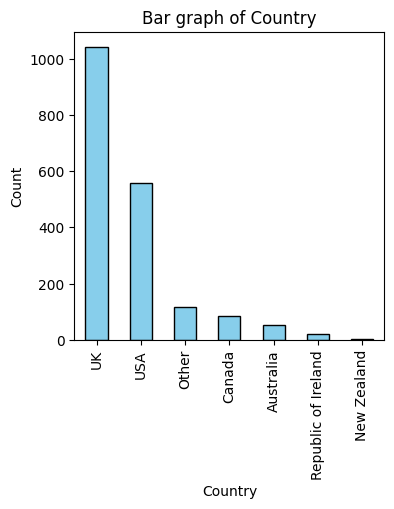

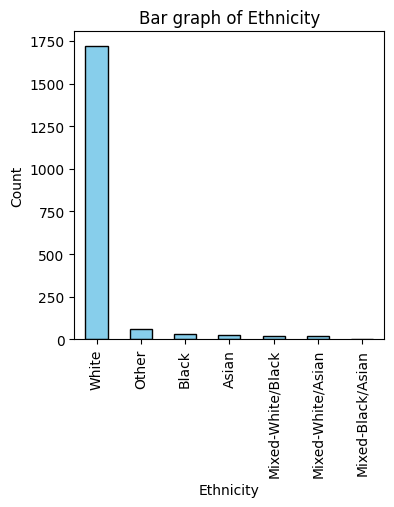

In [ ]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

for feature in features:
    counts = analyze_data[feature].value_counts()
    counts.plot(kind='bar', figsize=(4,4), color='skyblue', edgecolor='black')
    plt.title(f'Bar graph of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


# **Barplots of hard drugs usage depending on age**

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


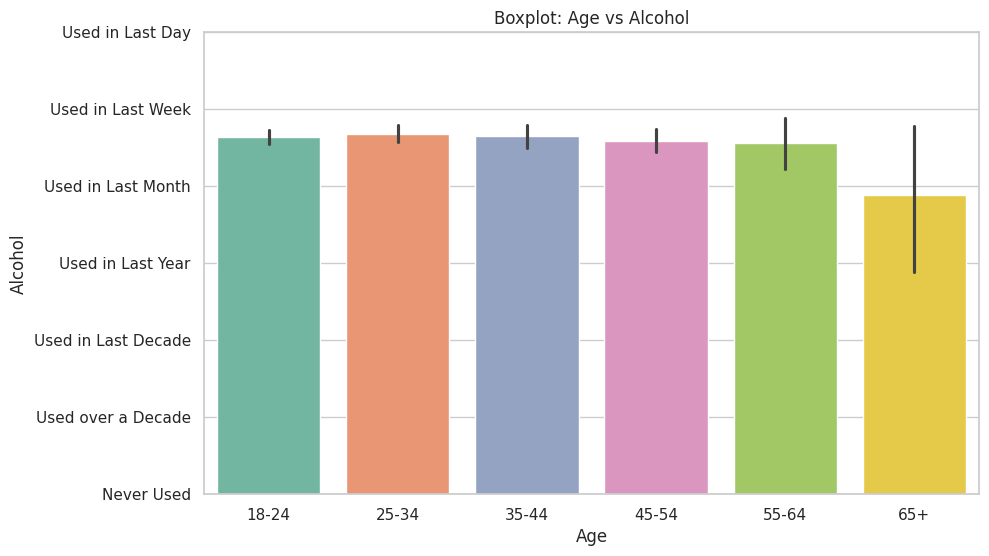

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


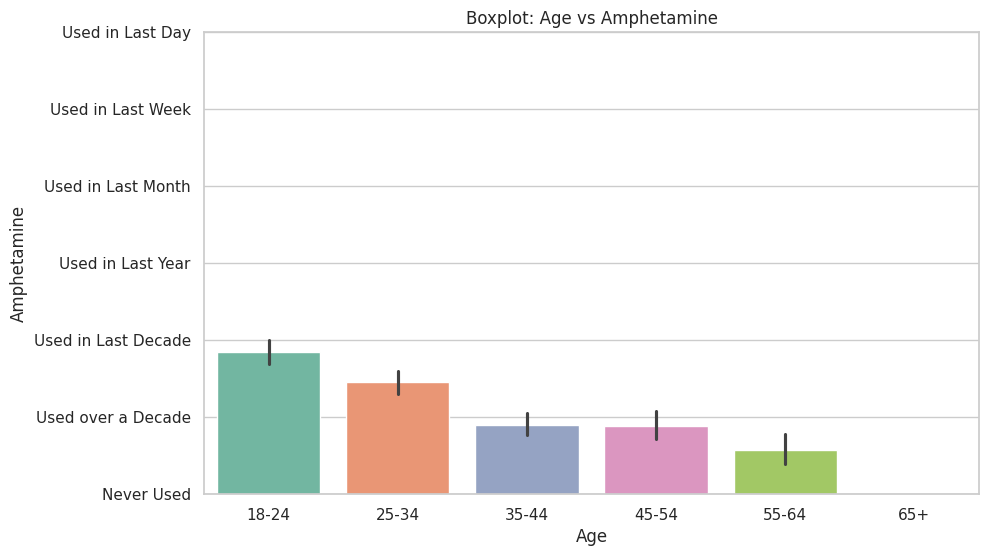

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


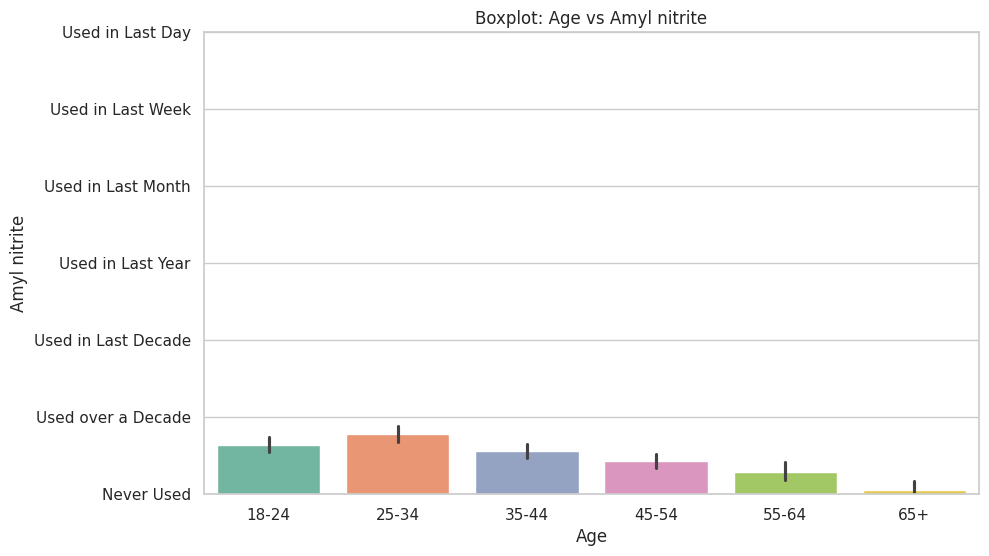

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


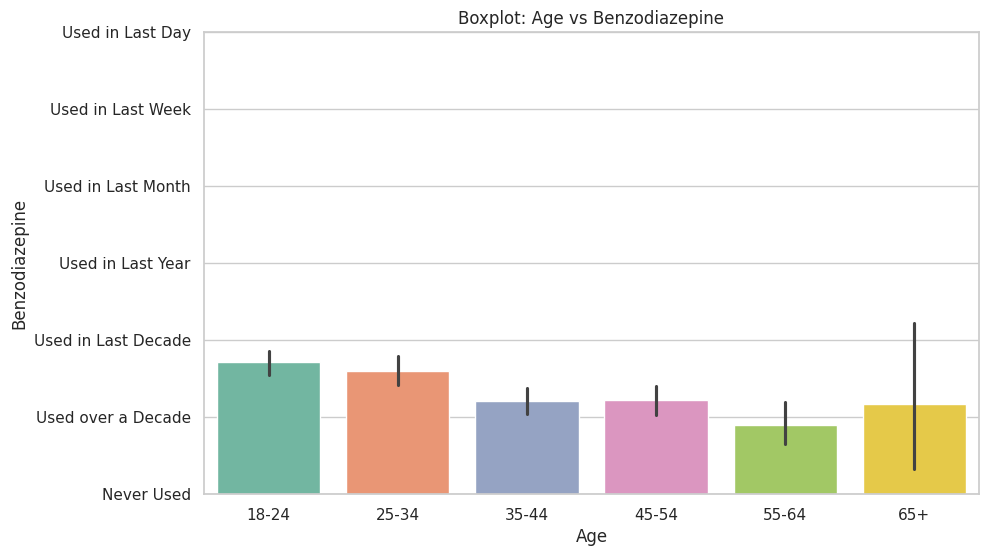

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


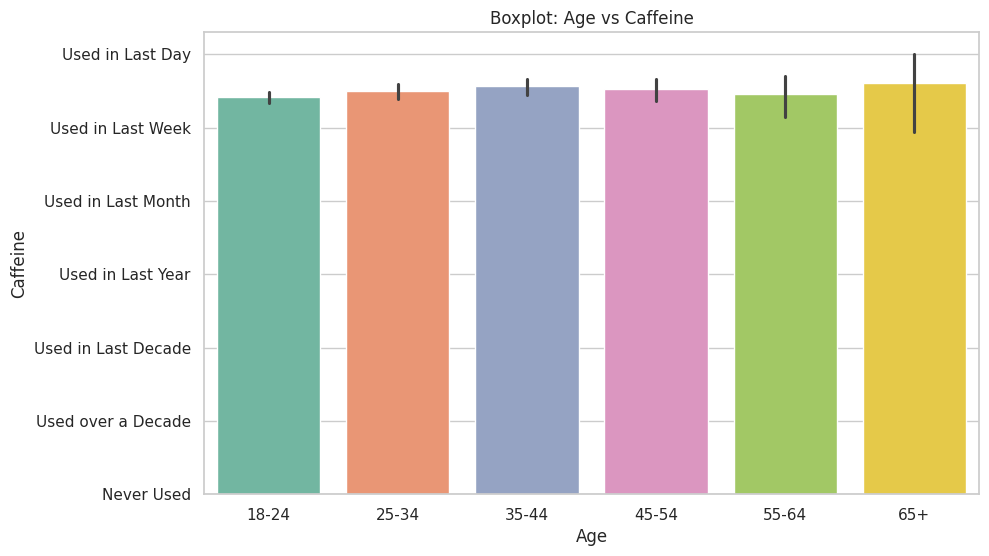

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


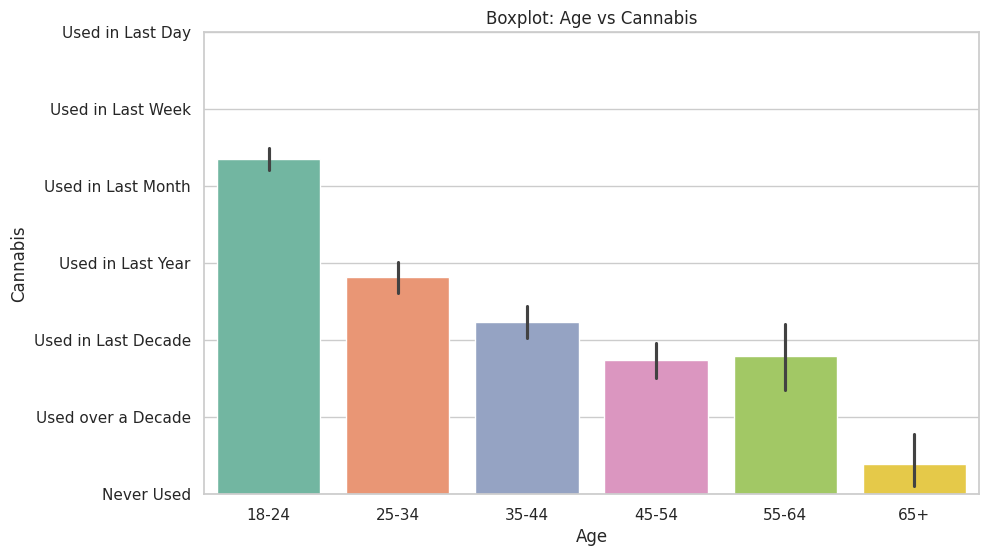

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


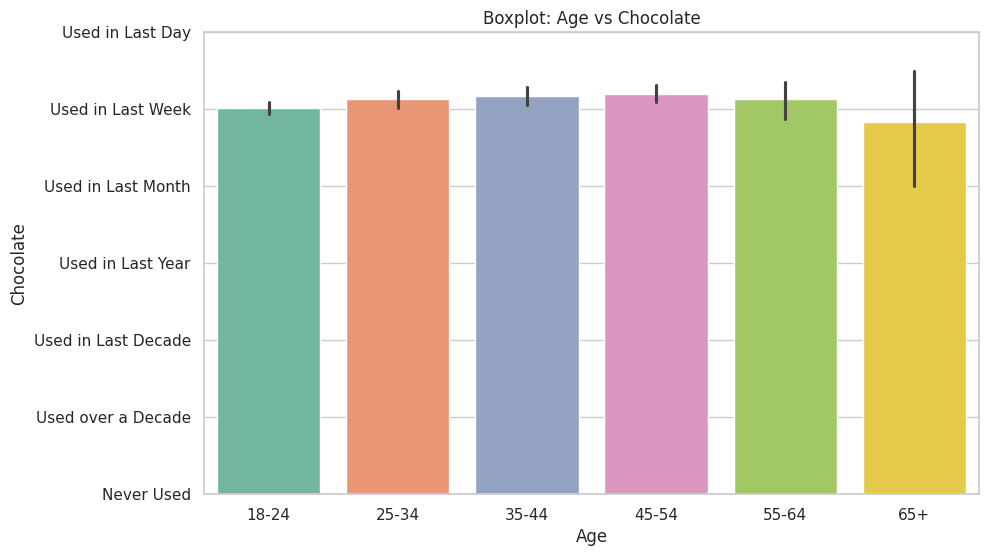

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


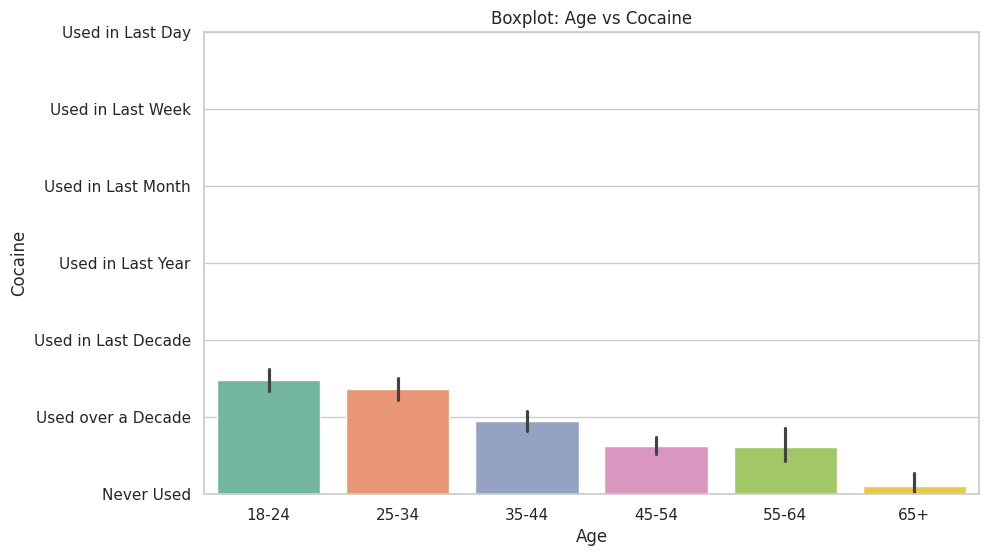

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


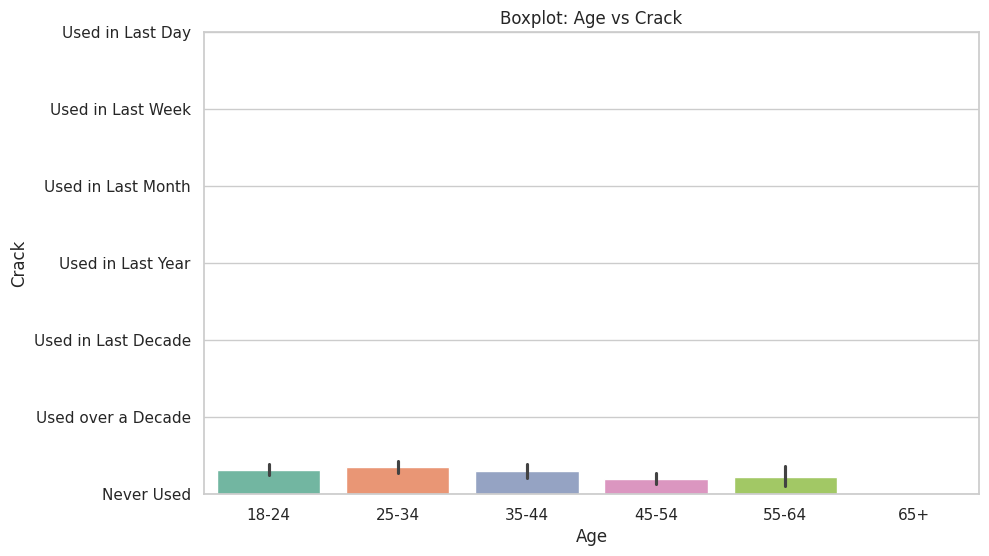

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


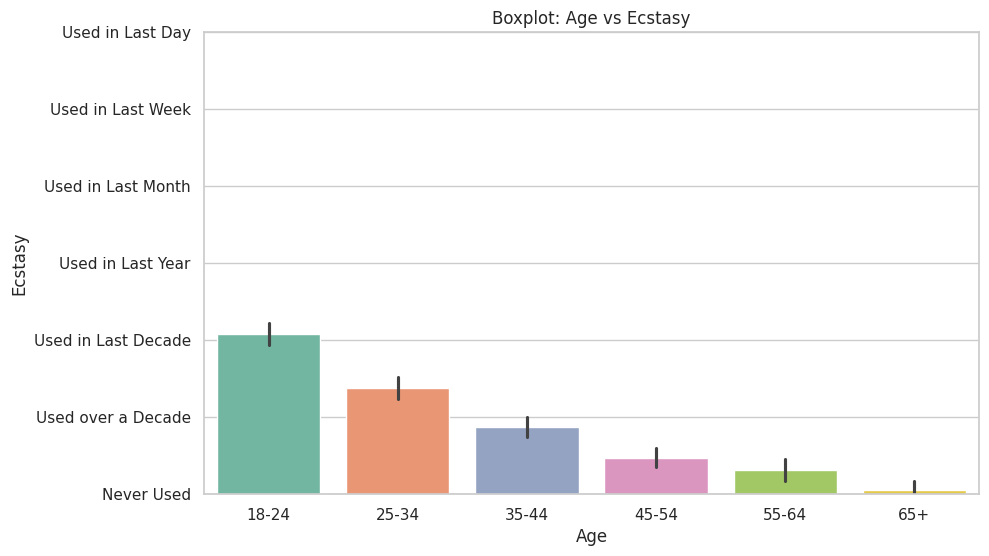

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


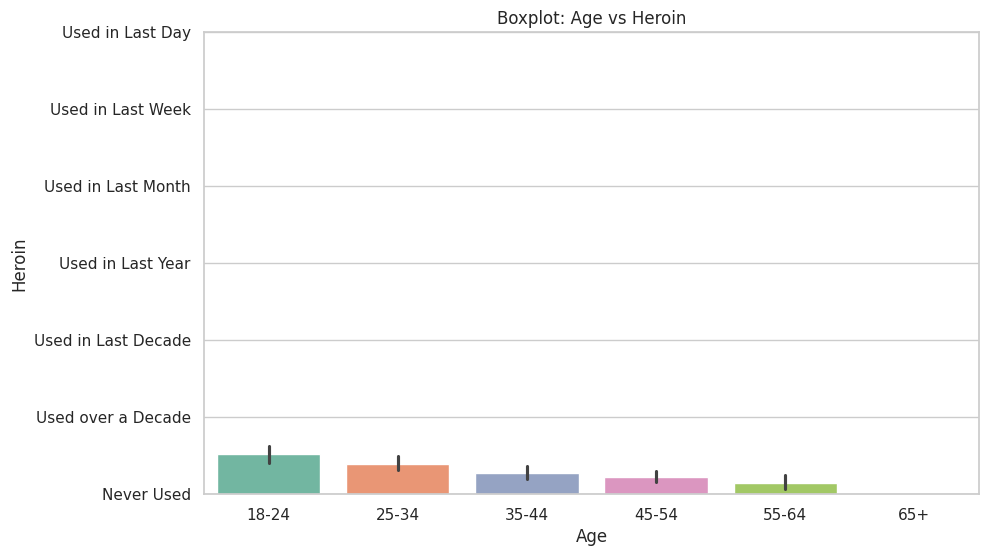

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


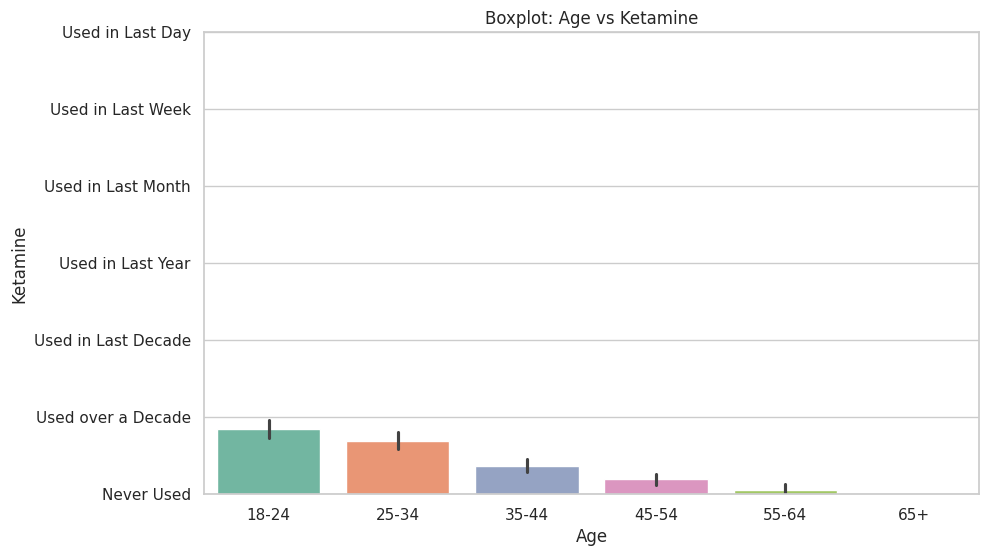

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


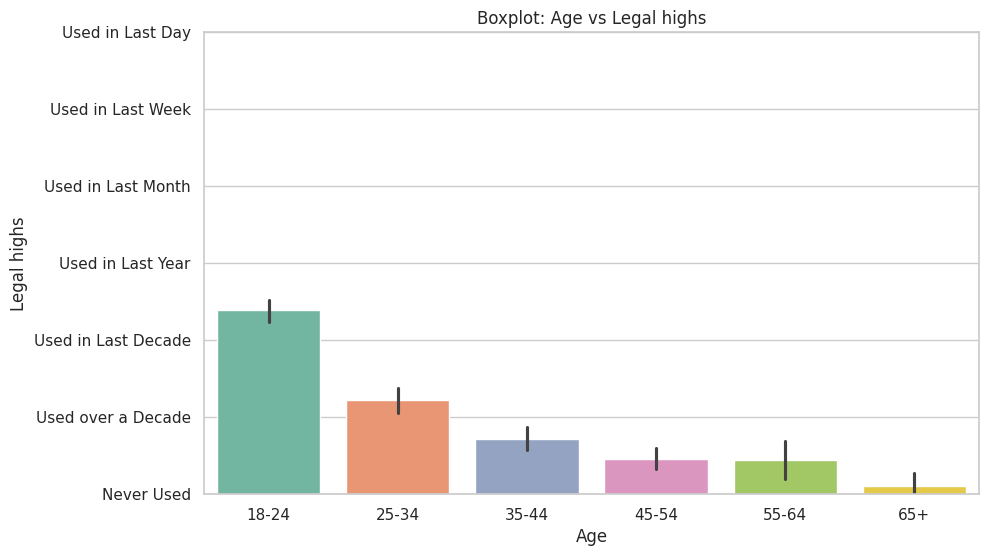

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


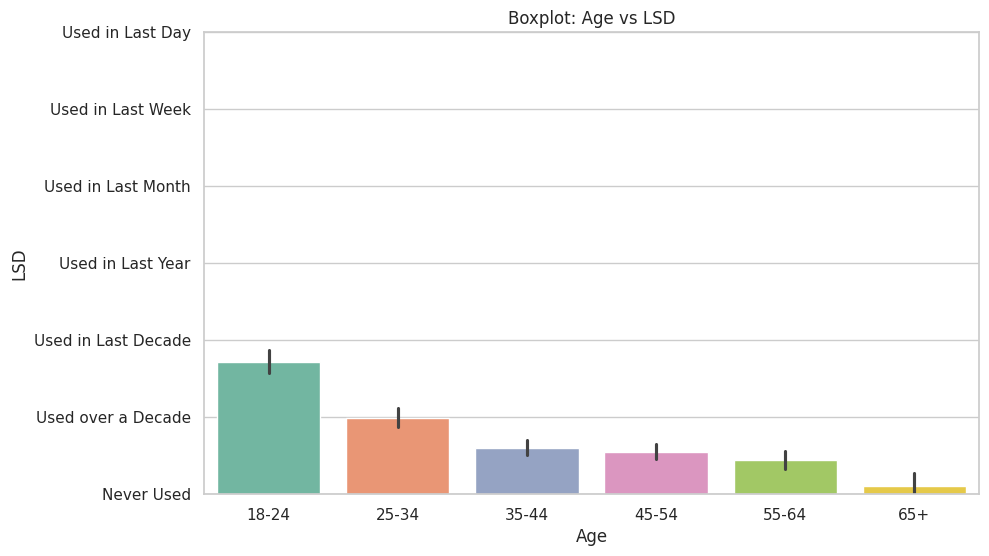

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


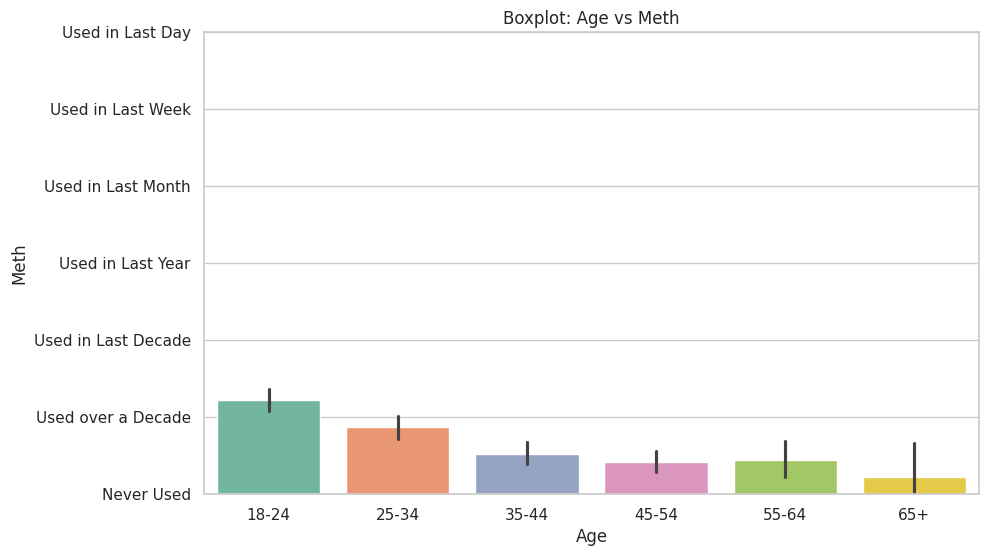

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


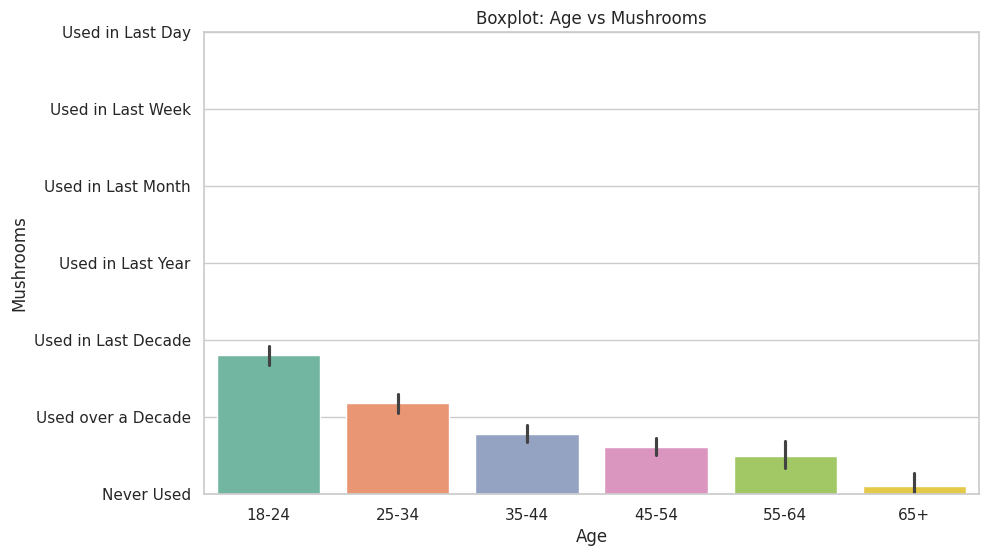

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


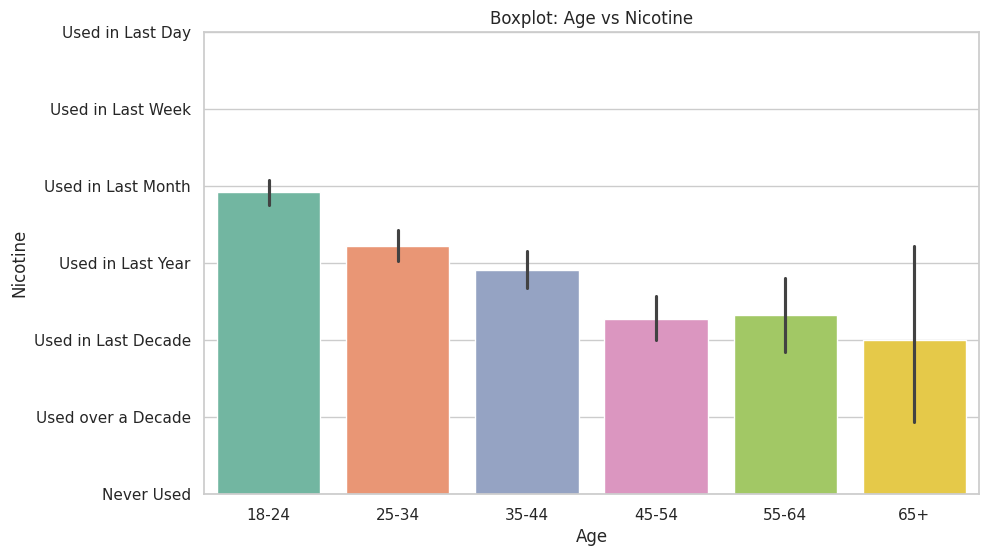

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


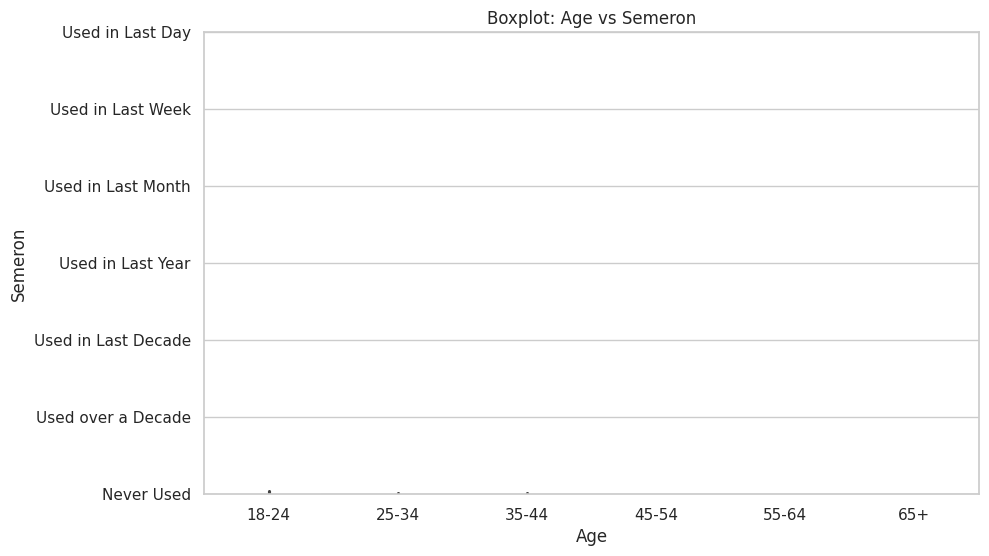

<ipython-input-13-0e02e7f825dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_1, y=feature_2, palette="Set2")


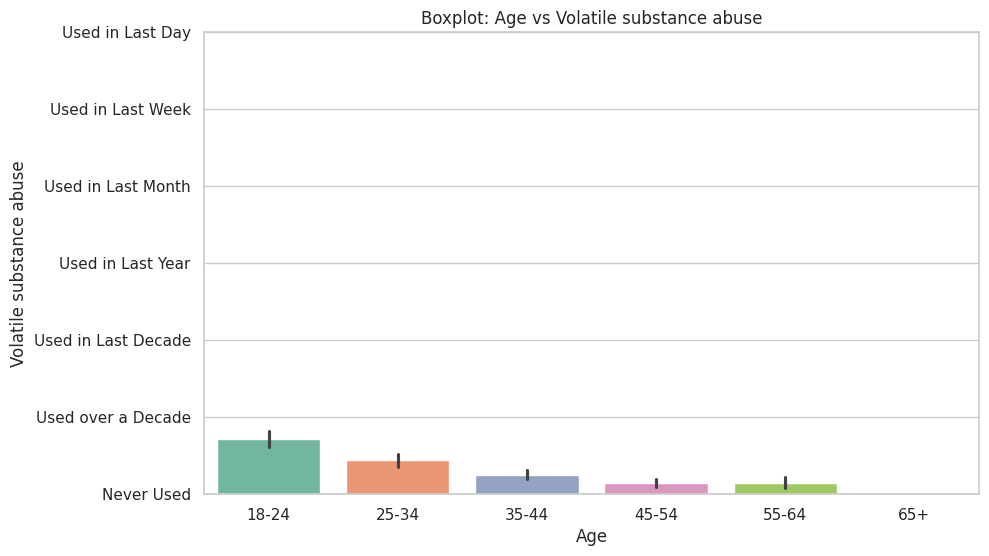

In [ ]:
def plot_boxplot_by_feature_name(feature_name_2):
    feature_name_1 = 'Age'

    feature_1 = analyze_data[feature_name_1]
    feature_2 = analyze_data[feature_name_2]
    age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    feature_1 = pd.Categorical(feature_1, categories=age_order, ordered=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_1, y=feature_2, palette="Set2")
    plt.xlabel(feature_name_1)
    plt.ylabel(feature_name_2)
    plt.title(f'Boxplot: {feature_name_1} vs {feature_name_2}')
    y_tick_labels = ['Never Used', 'Used over a Decade', 'Used in Last Decade',
                     'Used in Last Year', 'Used in Last Month',
                     'Used in Last Week', 'Used in Last Day']
    plt.yticks(ticks=range(7), labels=y_tick_labels)
    plt.show()

feature_names = [
    'Alcohol', 'Amphetamine', 'Amyl nitrite', 'Benzodiazepine', 'Caffeine',
    'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
    'Legal highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron', 'Volatile substance abuse' ]

for feature_name_2 in feature_names:
    plot_boxplot_by_feature_name(feature_name_2)


# **Histogram of Drugs**

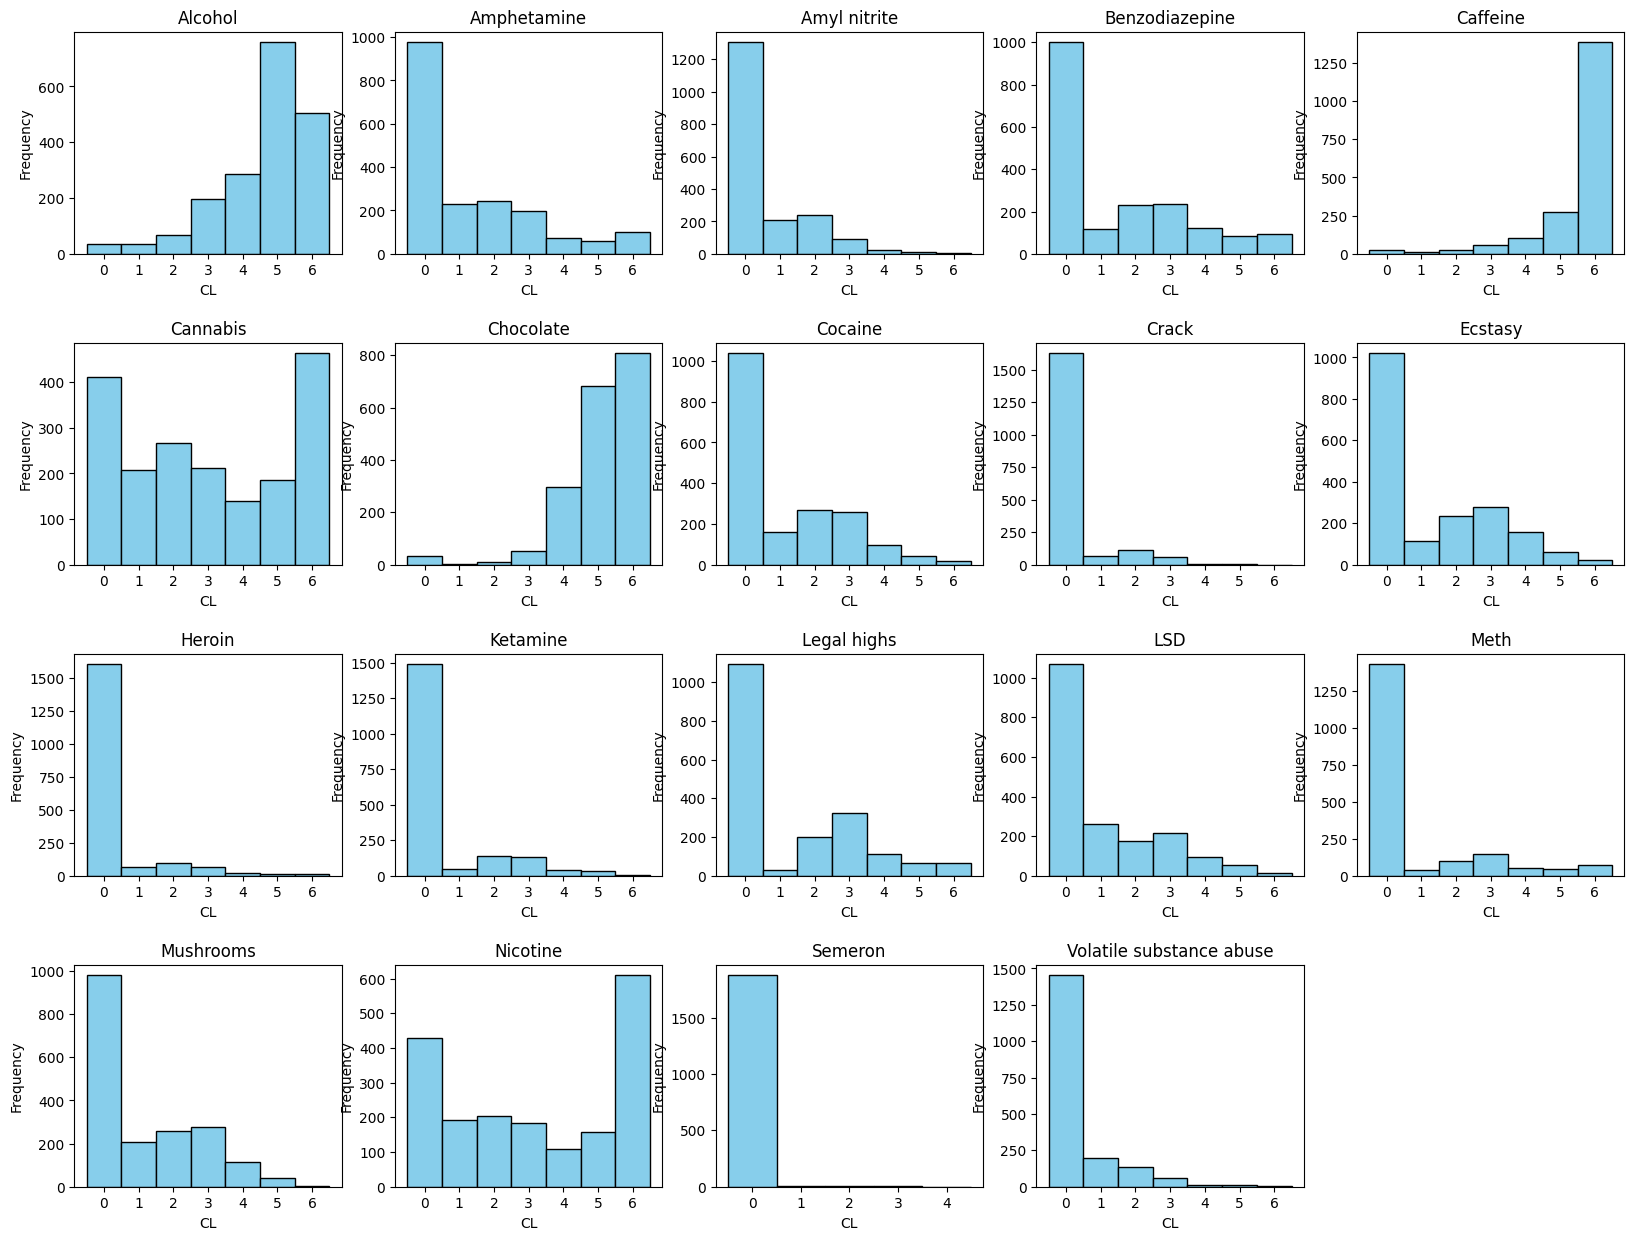

In [22]:
feature_names = [
    'Alcohol', 'Amphetamine', 'Amyl nitrite', 'Benzodiazepine', 'Caffeine',
    'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
    'Legal highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron', 'Volatile substance abuse' ]

# Calculate the number of subplots needed
num_features = len(tests_data.columns)
num_rows = 4  # Changed to 3 rows
num_cols = (num_features + num_rows - 1) // num_rows  # Adjust calculation

# Create subplots with calculated dimensions
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))  # Adjust figsize
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4) #Adjust vertical space between rows

for i, feature in enumerate(tests_data.columns):
    ax = axes[i]
    # Get unique values and set them as bin edges
    unique_values = sorted(tests_data[feature].unique())
    bin_edges = [x - 0.5 for x in unique_values] + [unique_values[-1] + 0.5]

    counts, bins, patches = ax.hist(tests_data[feature], bins=bin_edges, color='skyblue', edgecolor='black', rwidth=1)
    ax.set_xticks(unique_values) # Set x-axis ticks to unique values
    ax.set_title(feature)
    ax.set_xlabel("CL")
    ax.set_ylabel("Frequency")



# Hide any remaining empty subplots (if any)
for i in range(num_features, len(axes)):
    axes[i].axis('off')  # Turn off the axis for empty plots


plt.savefig("psychological_tests_histograms.png")
plt.show()

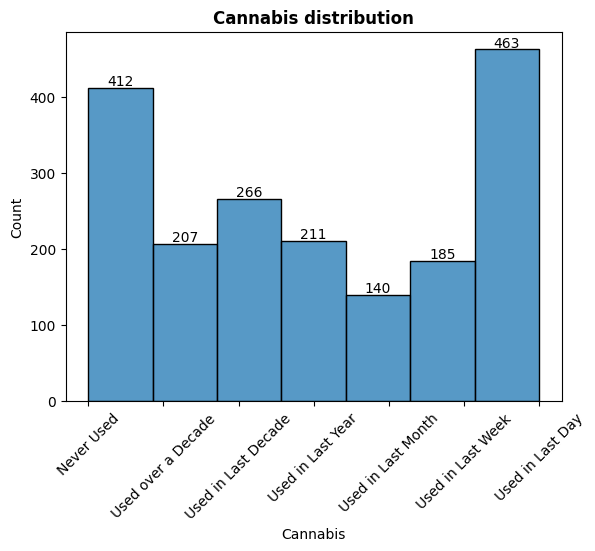

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


tests_data = analyze_data['Cannabis']
ax = sns.histplot(tests_data, bins=7)  # Store the axes object

x_tick_labels = ['Never Used', 'Used over a Decade', 'Used in Last Decade',
                 'Used in Last Year', 'Used in Last Month',
                 'Used in Last Week', 'Used in Last Day']

plt.xticks(ticks=range(7), labels=x_tick_labels, rotation=45)
plt.title('Cannabis distribution', fontweight='bold')

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.0f}'.format(height), ha="center")

plt.show()

# **Bargraphs that show percentage of last usage more than one year depending on the other features**

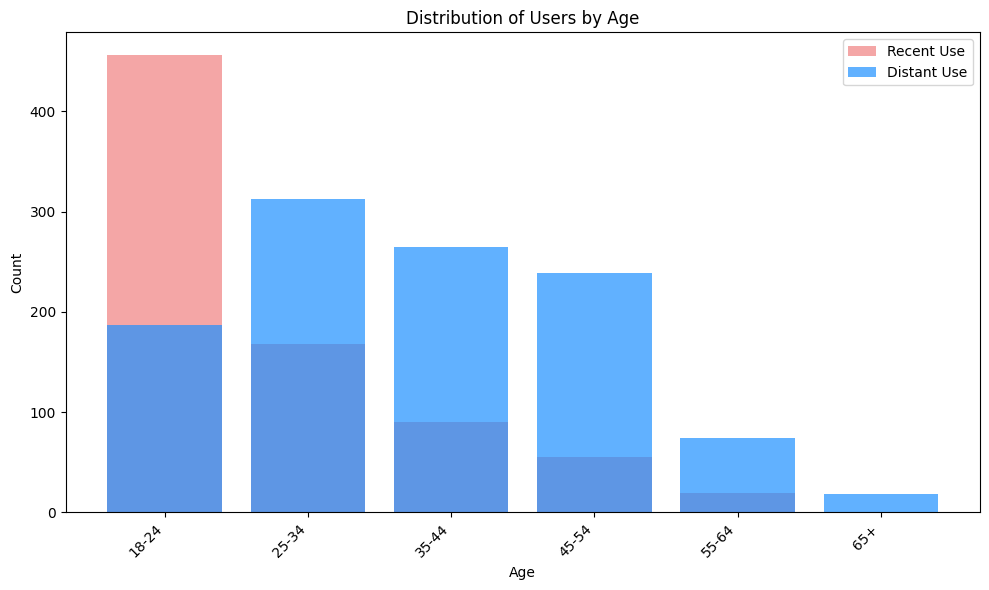

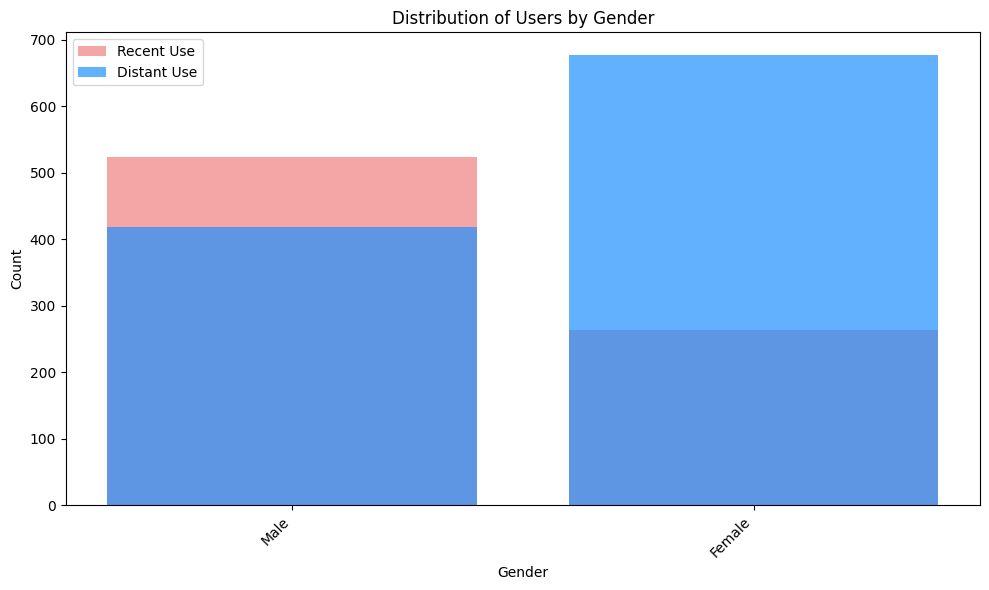

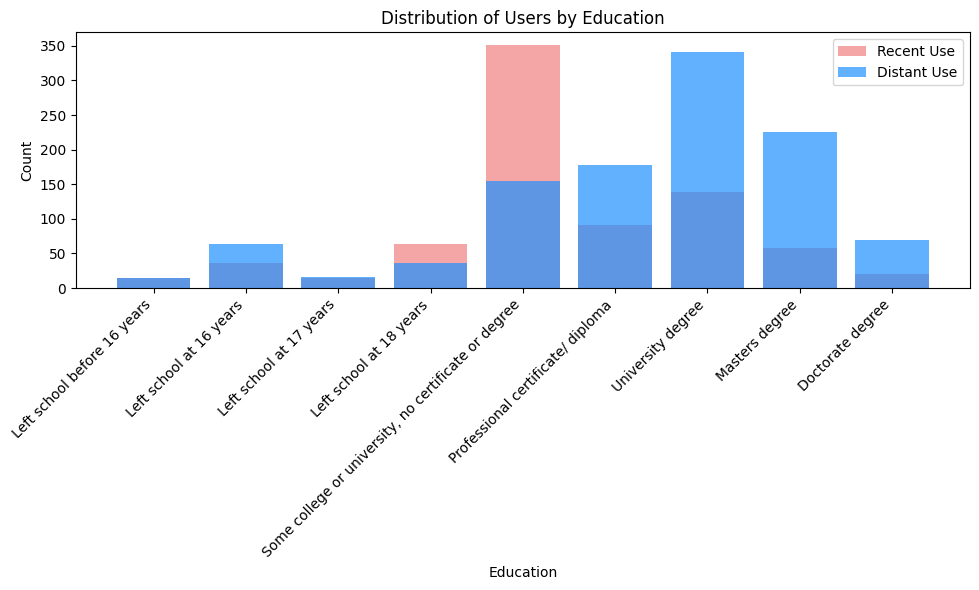

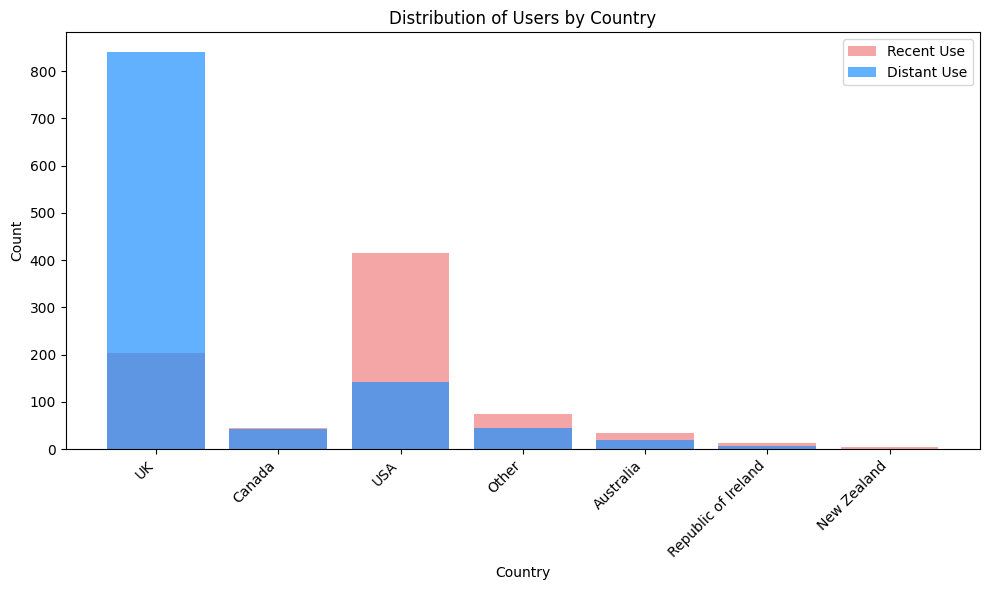

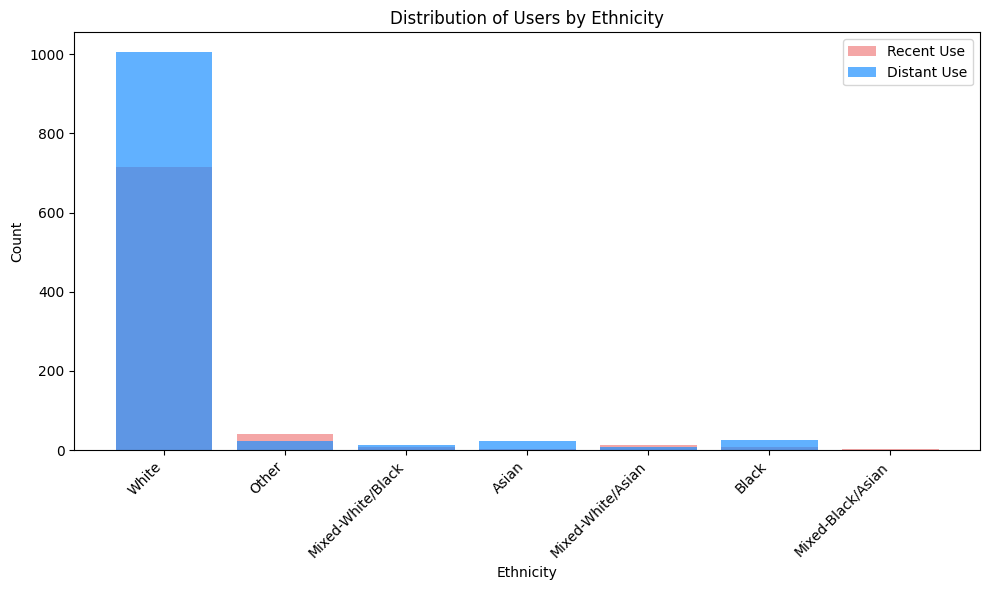

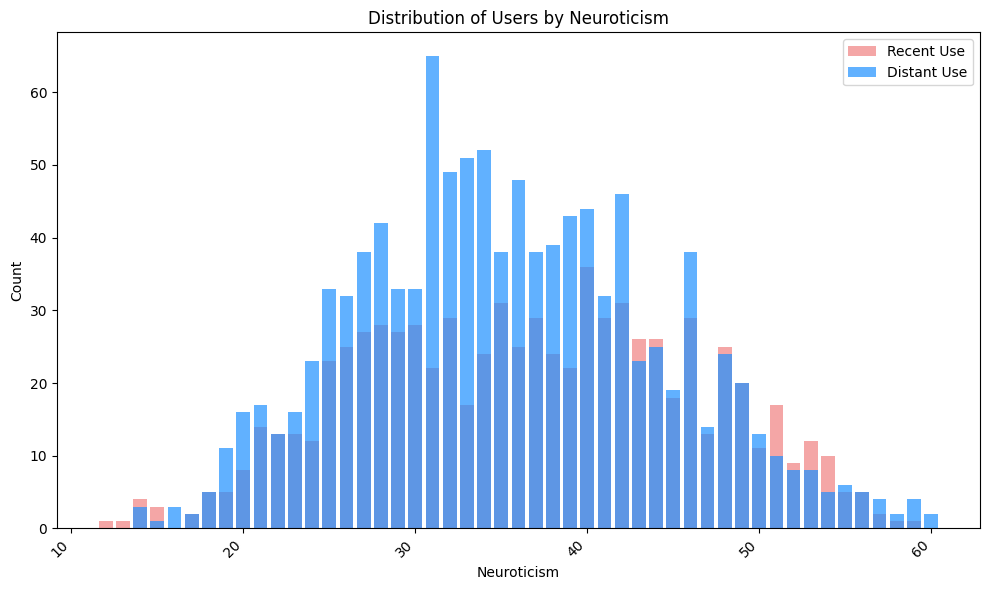

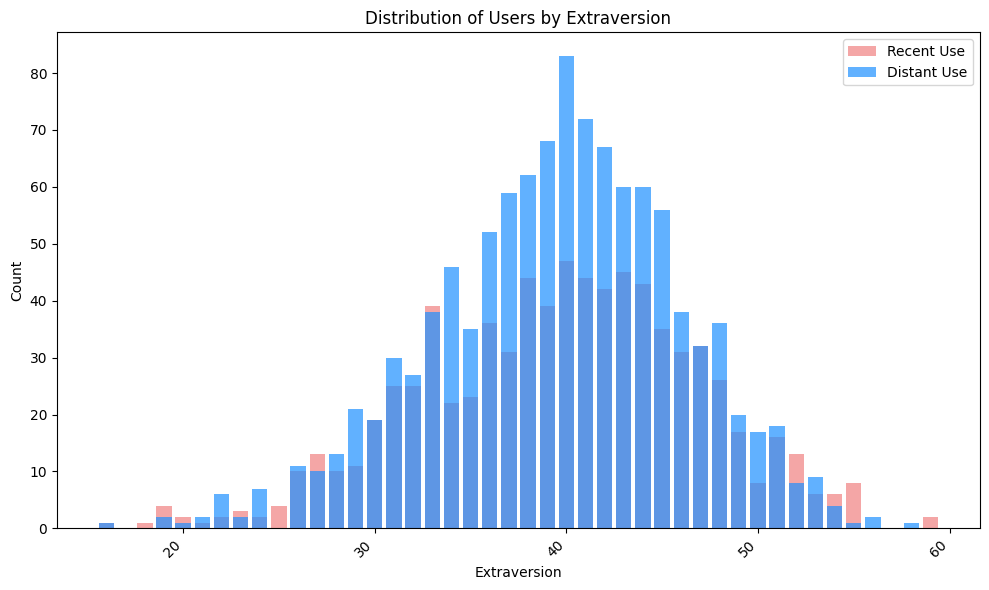

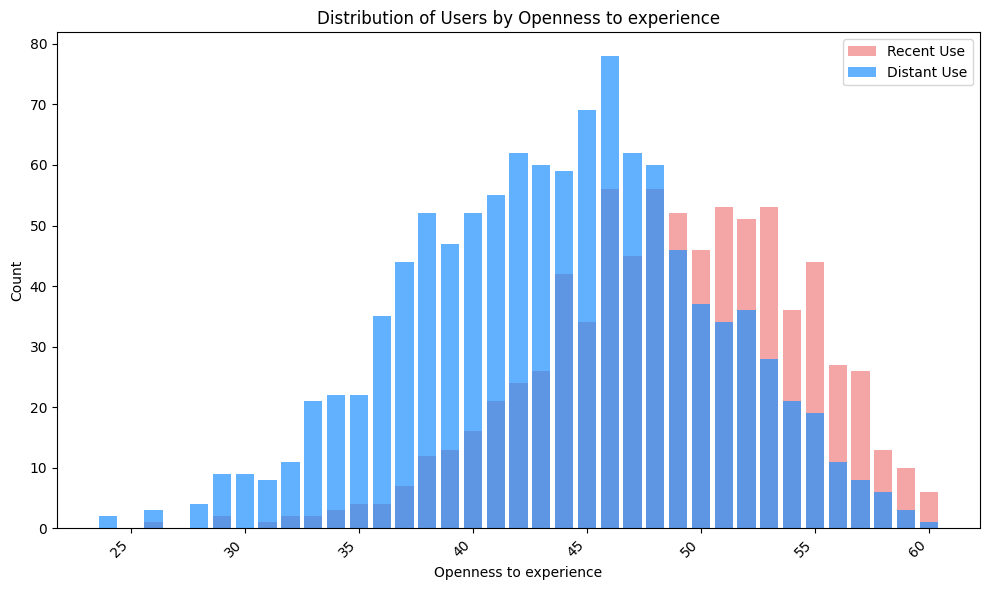

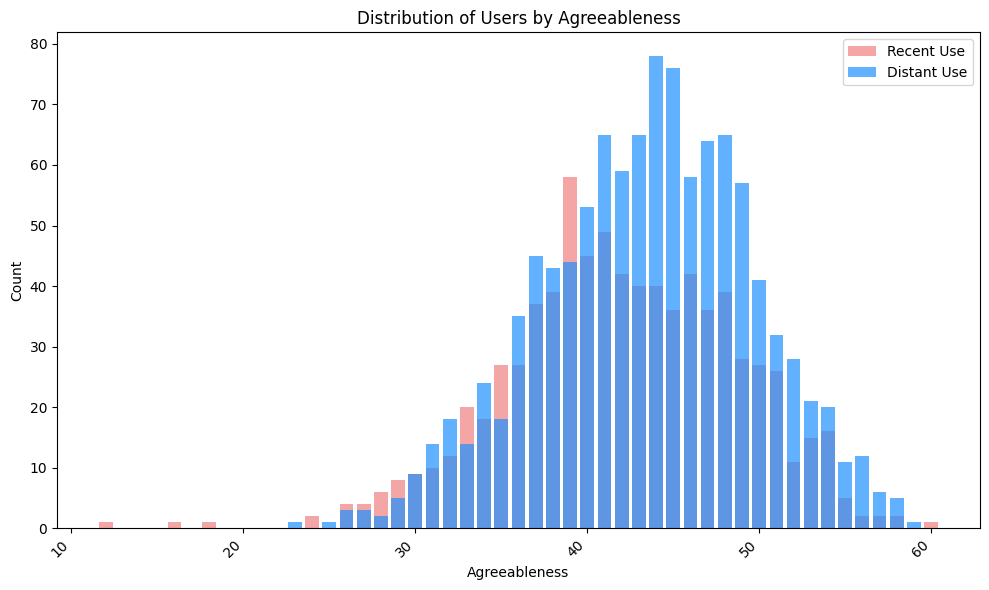

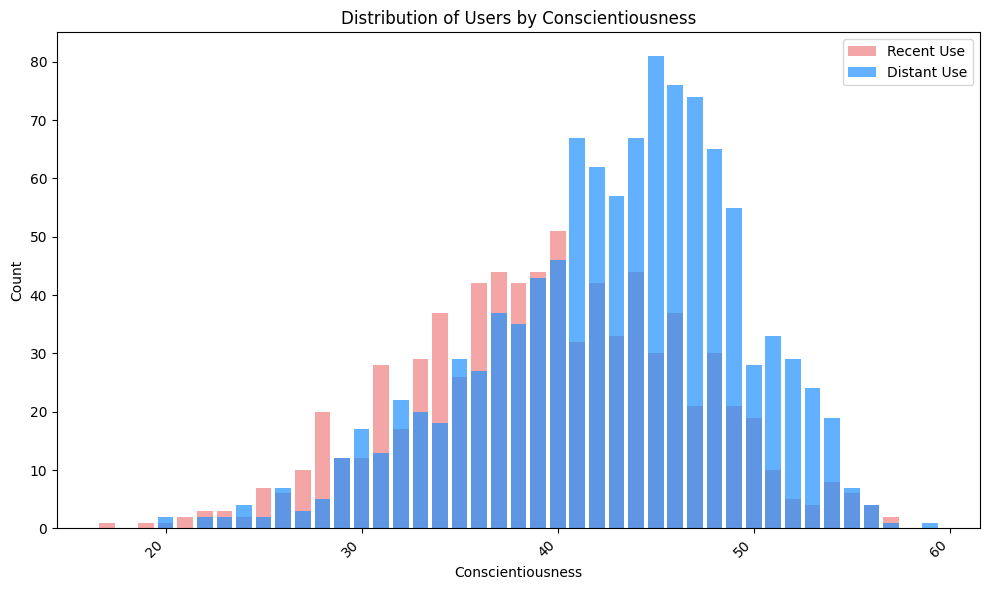

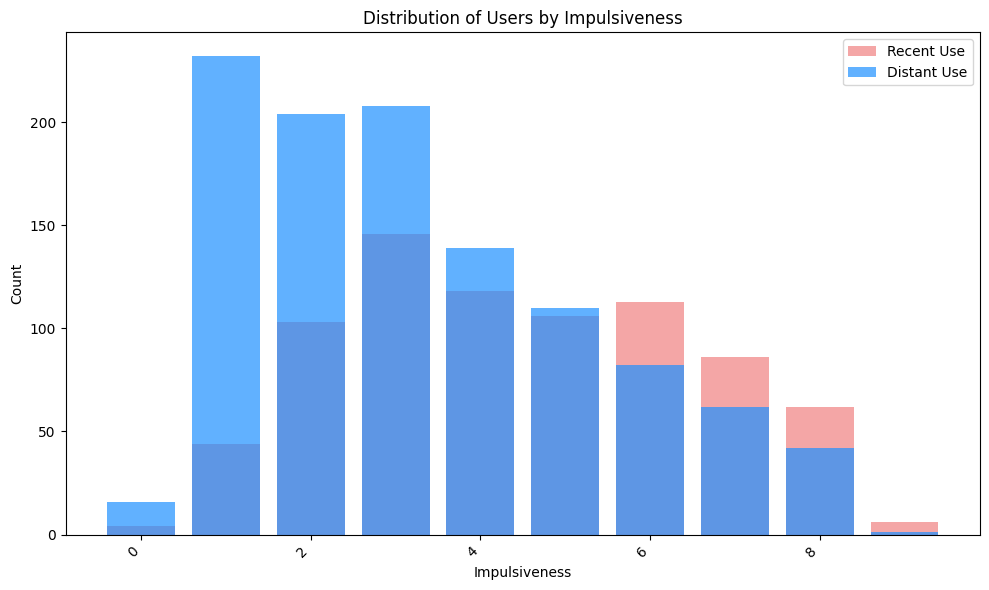

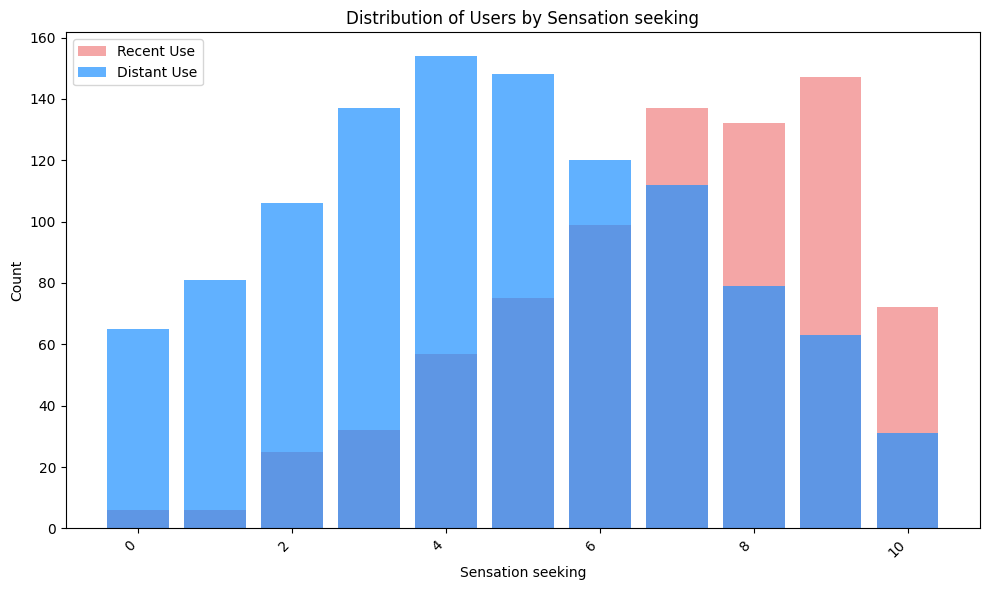

In [19]:
# Create separate datasets for distant users (row <= 4)
drugs_clear_recent = analyze_data[analyze_data[columns_to_check].apply(lambda row: (row > 3).all(), axis=1)]
drugs_clear_distant = analyze_data[analyze_data[columns_to_check].apply(lambda row: (row <= 3).all(), axis=1)]

# Drop the columns that are not needed for further analysis
drugs_clear_recent = drugs_clear_recent.drop(columns_to_check, axis=1)
drugs_clear_distant = drugs_clear_distant.drop(columns_to_check, axis=1)

# Reset index for clean plotting
drugs_clear_recent = drugs_clear_recent.reset_index(drop=True)
drugs_clear_distant = drugs_clear_distant.reset_index(drop=True)

sample_count_dict_recent = {}
sample_count_dict_distant = {}

# Iterate through the columns to analyze for both groups (recent and distant users)
for column in columns_to_analyze:
    column_sample_count_recent = {}
    column_sample_count_distant = {}

    unique_values = analyze_data[column].unique()

    # Calculate the count for recent users
    for value in unique_values:
        total_value_count_recent = analyze_data[analyze_data[column] == value].shape[0]
        clear_value_count_recent = drugs_clear_recent[drugs_clear_recent[column] == value].shape[0]
        column_sample_count_recent[value] = clear_value_count_recent

    # Calculate the count for distant users
    for value in unique_values:
        total_value_count_distant = analyze_data[analyze_data[column] == value].shape[0]
        clear_value_count_distant = drugs_clear_distant[drugs_clear_distant[column] == value].shape[0]
        column_sample_count_distant[value] = clear_value_count_distant

    # Store both in the dictionary for each column
    sample_count_dict_recent[column] = column_sample_count_recent
    sample_count_dict_distant[column] = column_sample_count_distant

# Plotting the comparison between recent and distant users for each column
for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))

    # Get data for plotting
    data_recent = sample_count_dict_recent[column].items()
    data_distant = sample_count_dict_distant[column].items()

    unique_values_recent, percentages_recent = zip(*data_recent)
    unique_values_distant, percentages_distant = zip(*data_distant)

    # Reorder unique values for Age and Education columns
    if column == 'Age':
        unique_values_recent = [value for value in age_order if value in unique_values_recent]
        percentages_recent = [sample_count_dict_recent[column][value] for value in unique_values_recent]
        unique_values_distant = [value for value in age_order if value in unique_values_distant]
        percentages_distant = [sample_count_dict_distant[column][value] for value in unique_values_distant]

    elif column == 'Education':
        unique_values_recent = [value for value in education_order if value in unique_values_recent]
        percentages_recent = [sample_count_dict_recent[column][value] for value in unique_values_recent]
        unique_values_distant = [value for value in education_order if value in unique_values_distant]
        percentages_distant = [sample_count_dict_distant[column][value] for value in unique_values_distant]

    # Plotting the data
    plt.bar(unique_values_recent, percentages_recent, color='lightcoral', label='Recent Use', alpha=0.7)
    plt.bar(unique_values_distant, percentages_distant, color='dodgerblue', label='Distant Use', alpha=0.7)

    plt.title(f"Distribution of Users by {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Add legend
    plt.legend()

    # Improve layout for readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



# **Boxplots of two chosen features**

<ipython-input-5-d2379aab8d64>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature_1, y=feature_2, palette="Set2")


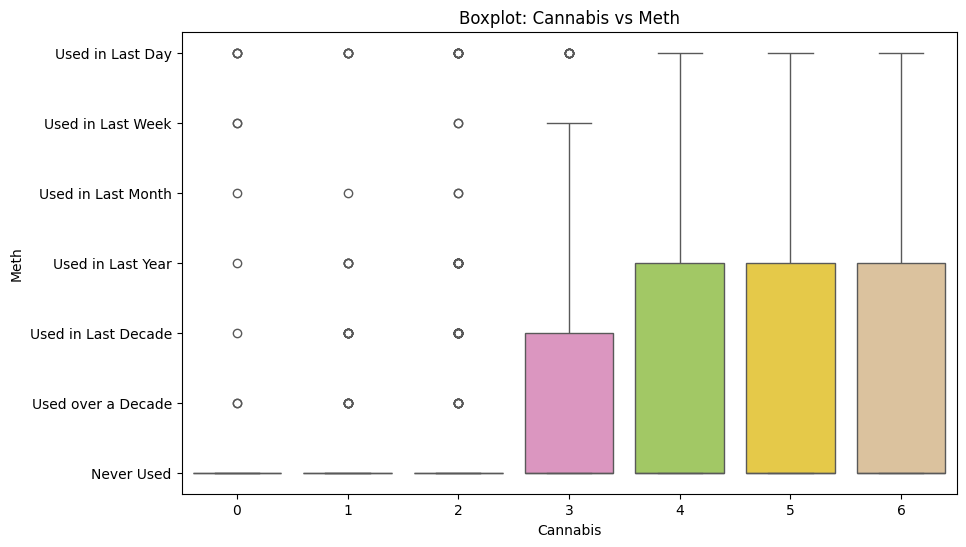

In [ ]:
feature_name_2 = 'Meth'
feature_name_1 = 'Cannabis'

feature_1 = analyze_data[feature_name_1]
feature_2 = analyze_data[feature_name_2]

plt.figure(figsize=(10, 6))
sns.boxplot(x=feature_1, y=feature_2, palette="Set2")
plt.xlabel(feature_name_1)
plt.ylabel(feature_name_2)
plt.title(f'Boxplot: {feature_name_1} vs {feature_name_2}')

y_tick_labels = ['Never Used', 'Used over a Decade', 'Used in Last Decade',
                 'Used in Last Year', 'Used in Last Month',
                 'Used in Last Week', 'Used in Last Day']

plt.yticks(ticks=range(7), labels=y_tick_labels)

plt.show()




# **Correlation heatmap after features selection**
Now training data is reduced to only useful features.

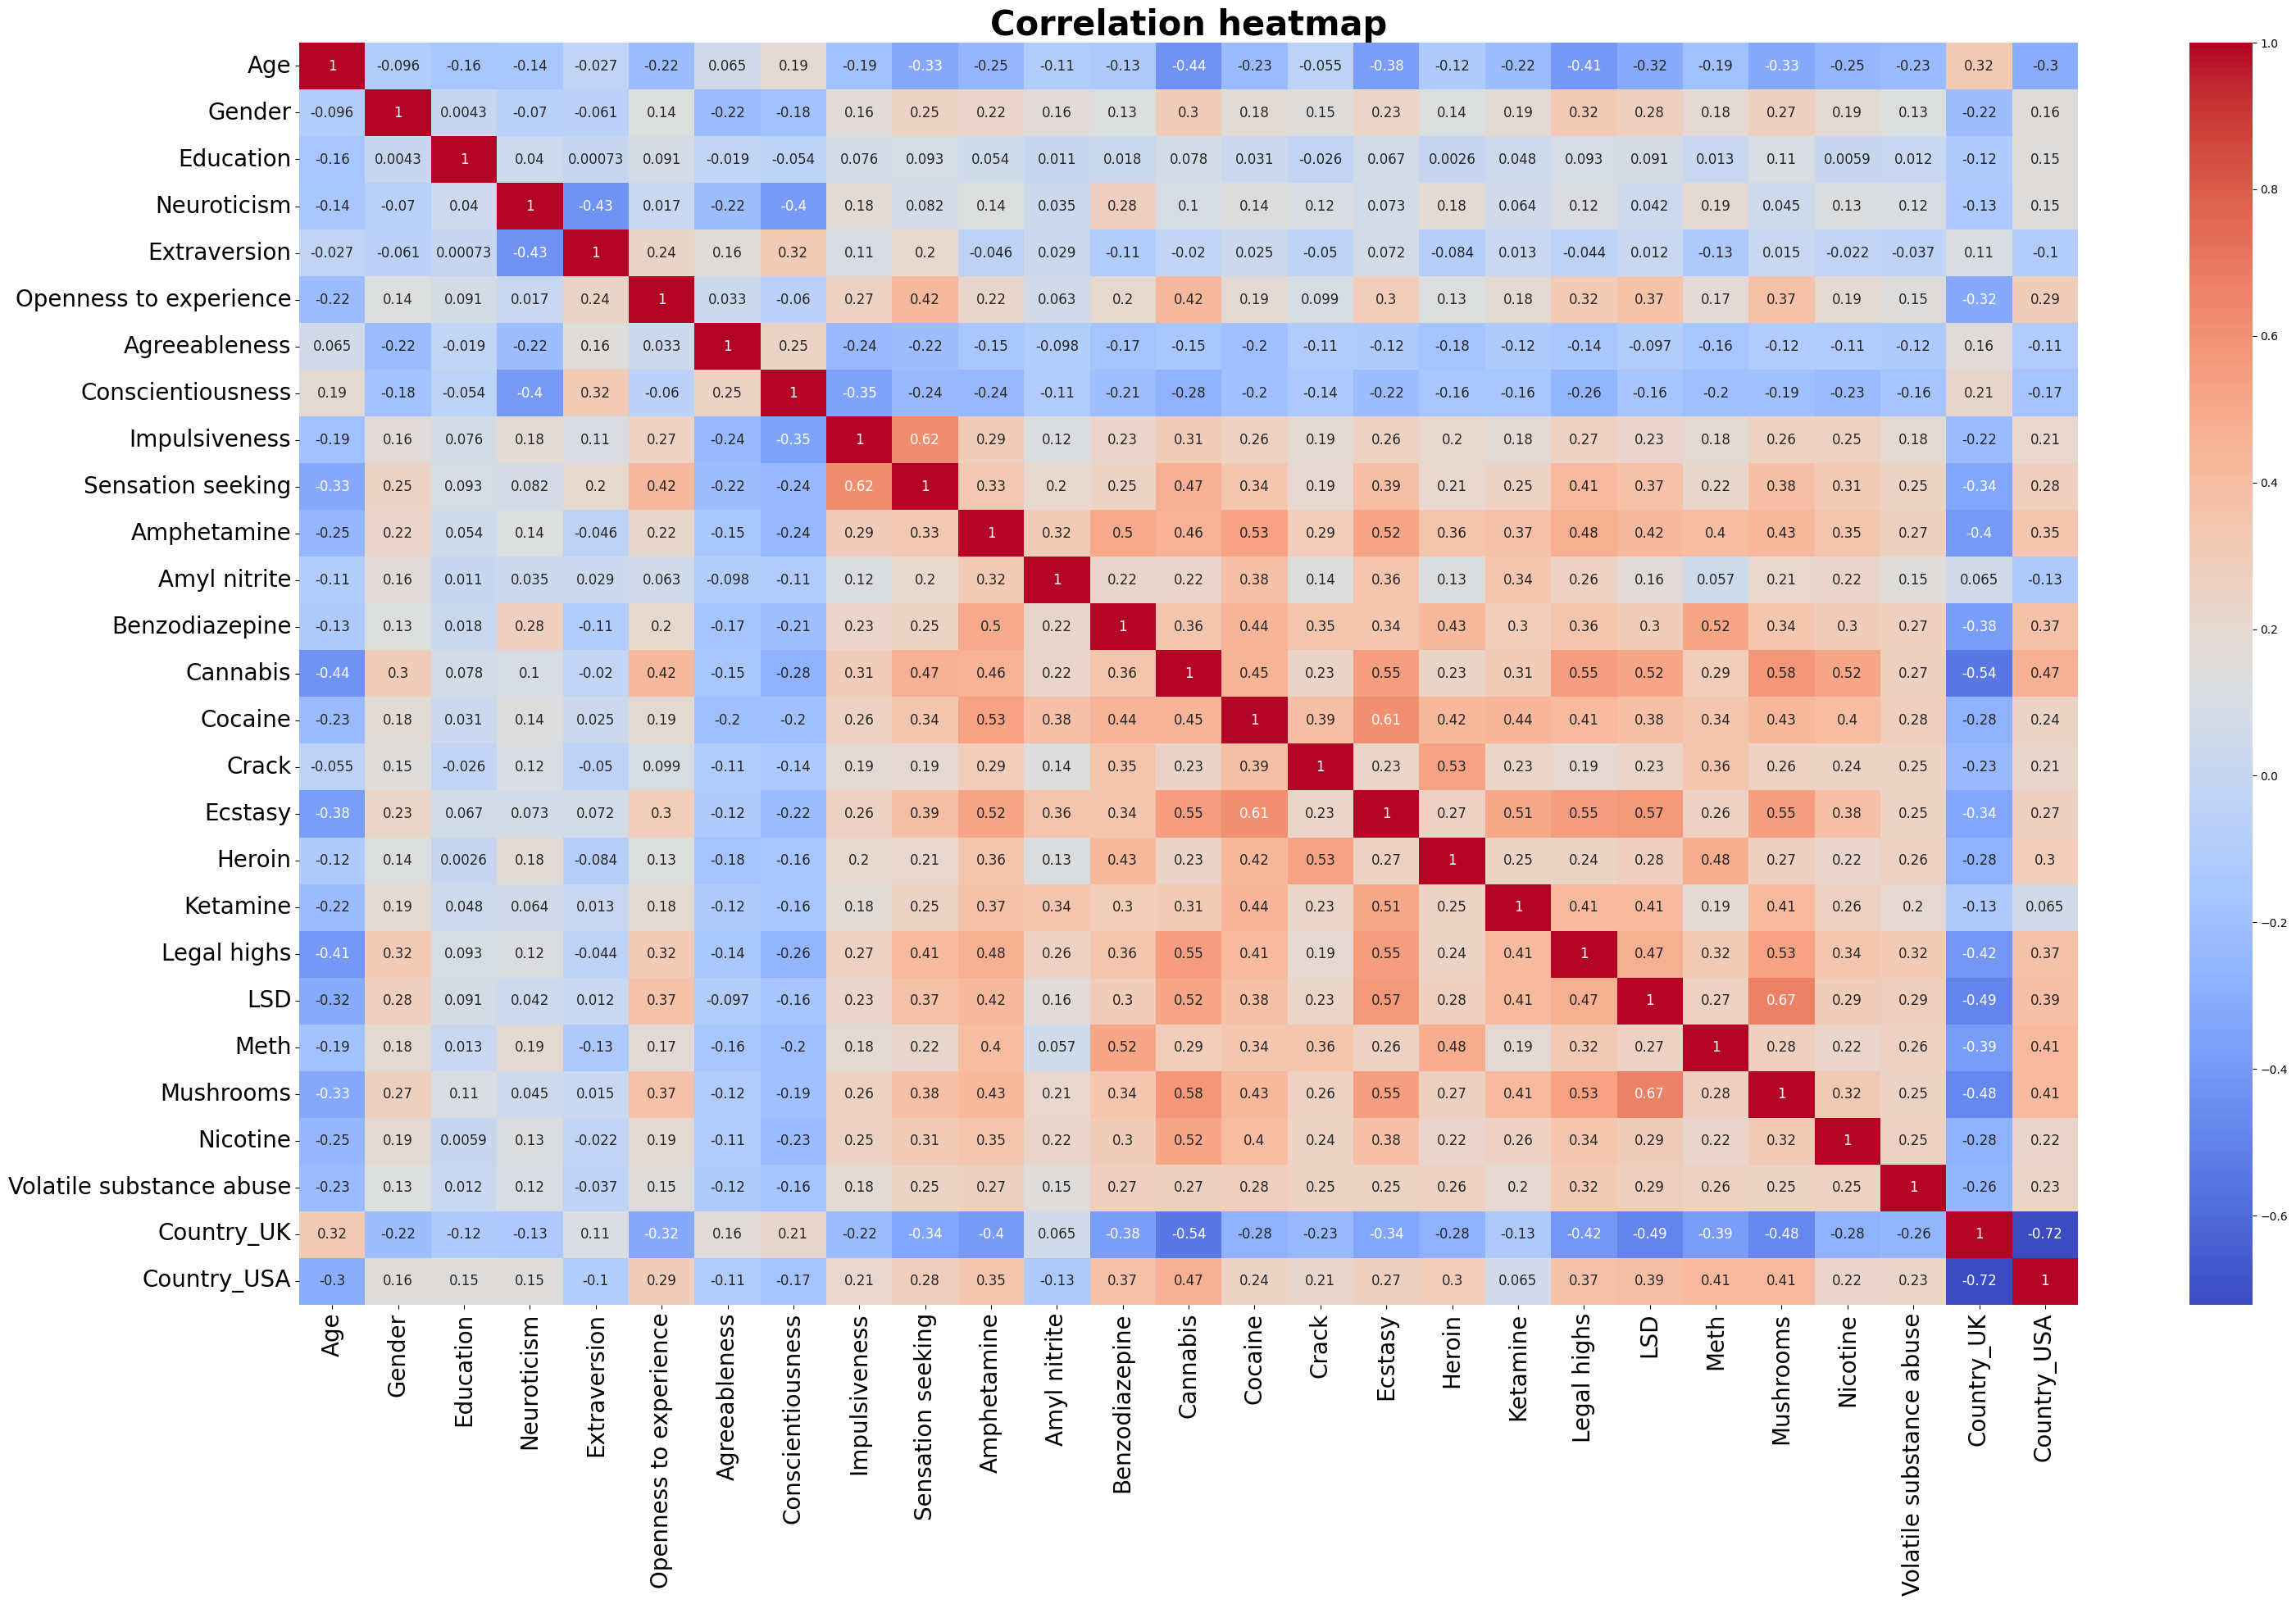

In [ ]:
selected_model_data = model_data.copy()
selected_model_data = selected_model_data.loc[:, ~model_data.columns.str.startswith('Ethnicity')].drop(['Semeron', 'Country_Australia', 'Country_Canada', 'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland', 'Alcohol', 'Caffeine', 'Chocolate'], axis=1)

selected_corr = selected_model_data.corr()
plt.figure(figsize=(35, 20))
sns.heatmap(selected_corr, cmap = 'coolwarm', annot = True, annot_kws={'size': 12})
plt.title('Correlation heatmap', fontsize=30, fontweight='bold')
plt.tick_params(axis='both', labelsize=20)
plt.show()